In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torchvision.transforms as transforms
from dataset.get_betti_number import betti_4_data

# 释放不需要的内存
torch.cuda.empty_cache()


d:\自学计算机\MY_Project\WuYang\topological_data_analysis\dataset\data2betti.py:96: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


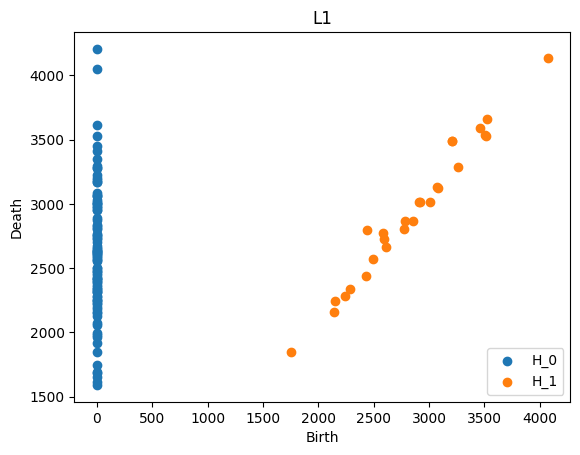

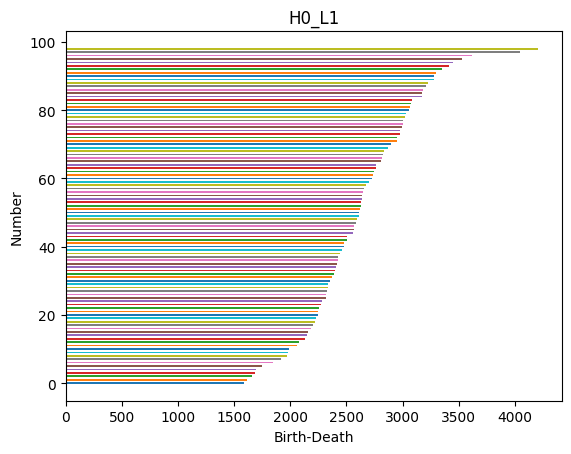

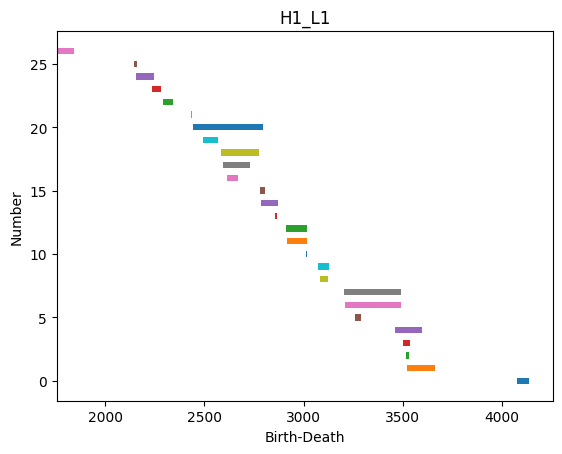

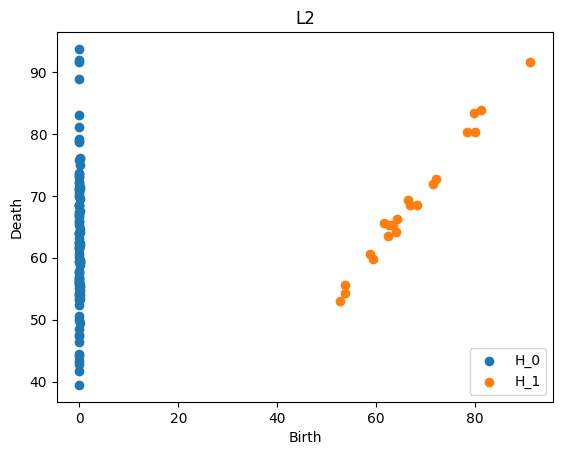

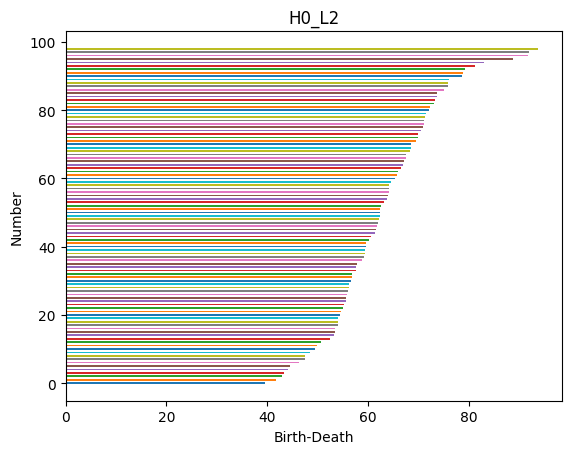

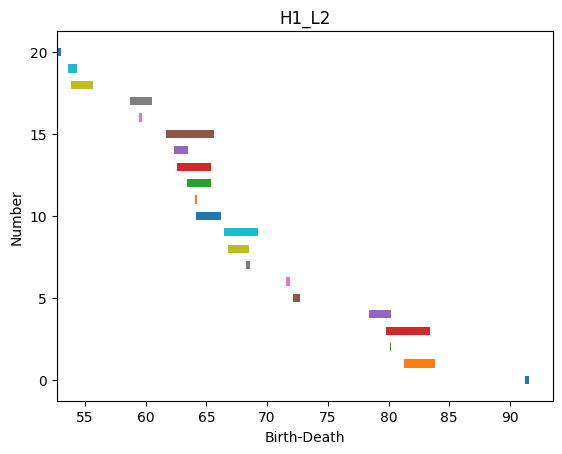

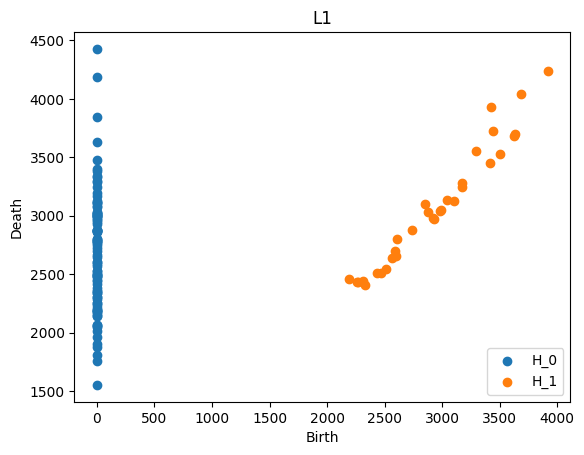

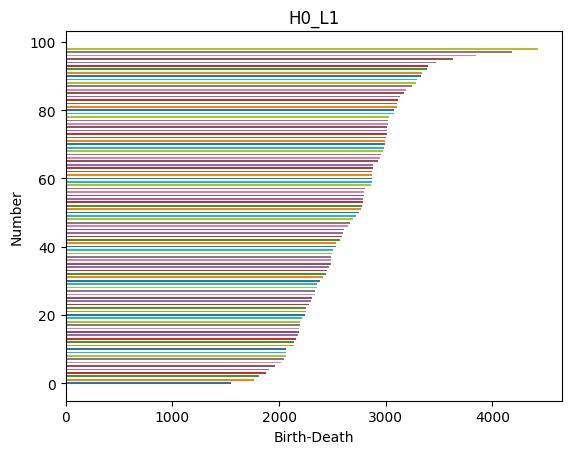

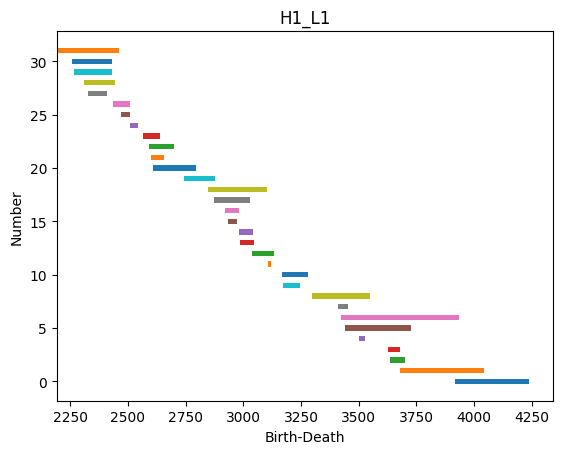

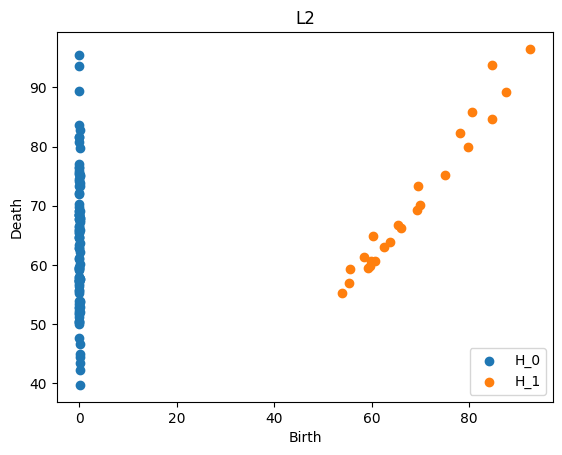

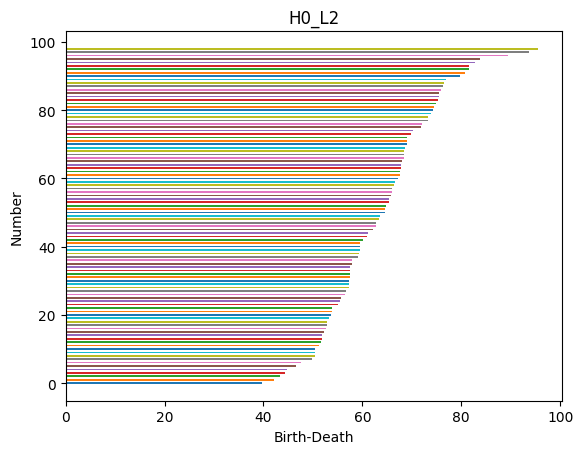

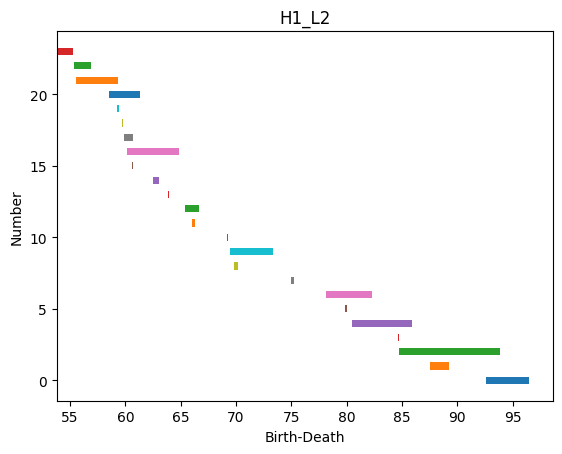

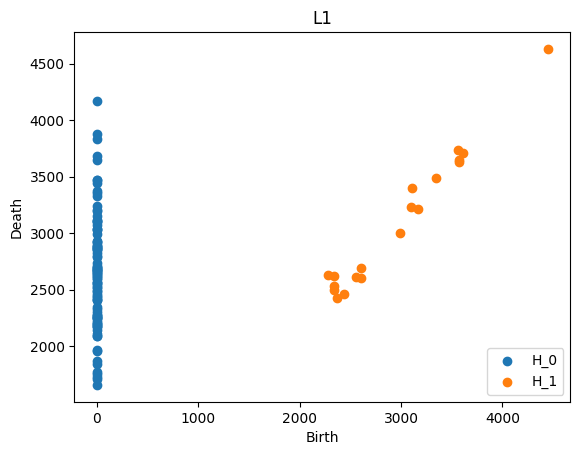

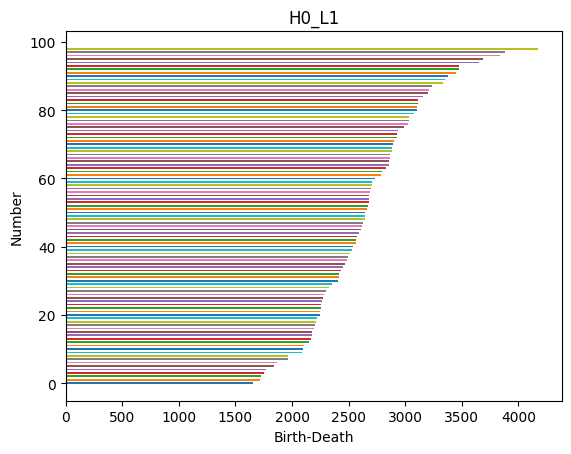

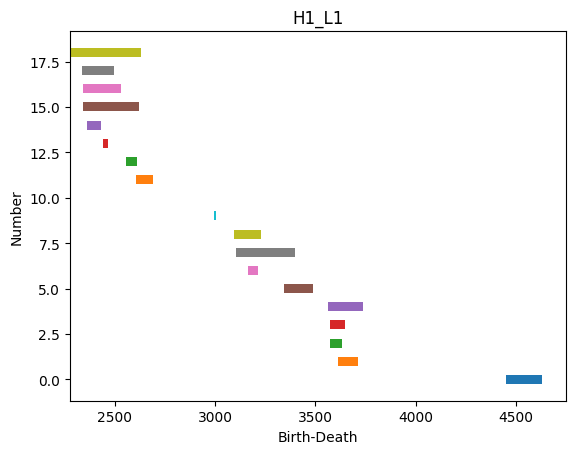

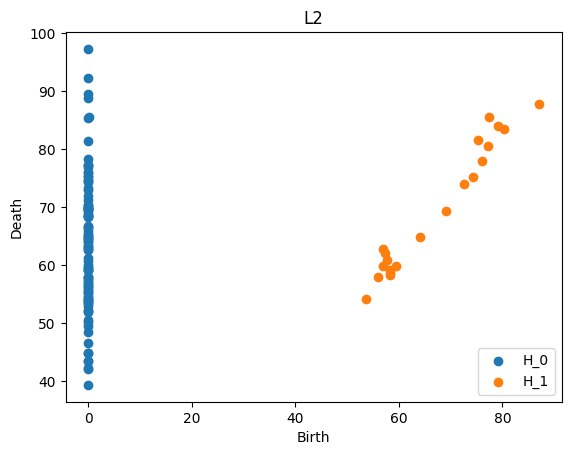

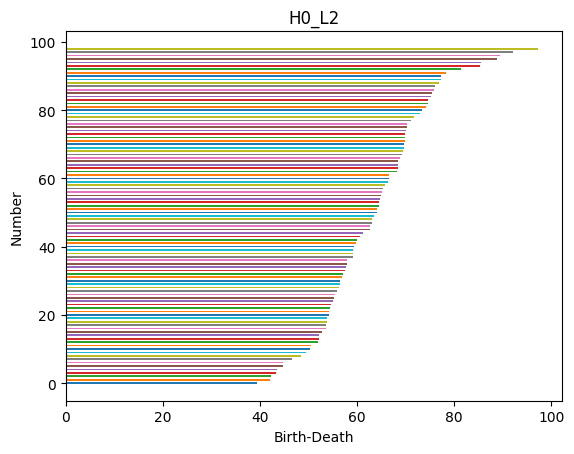

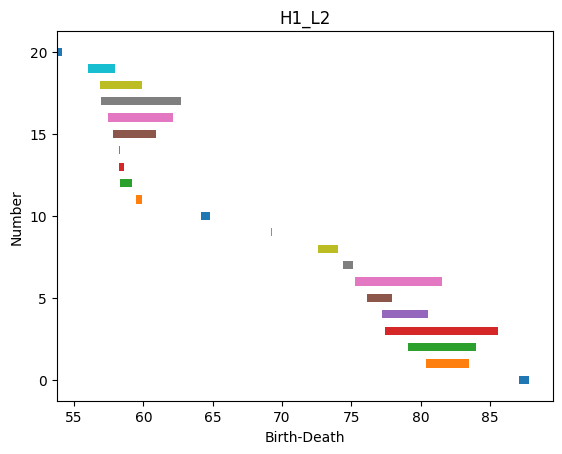

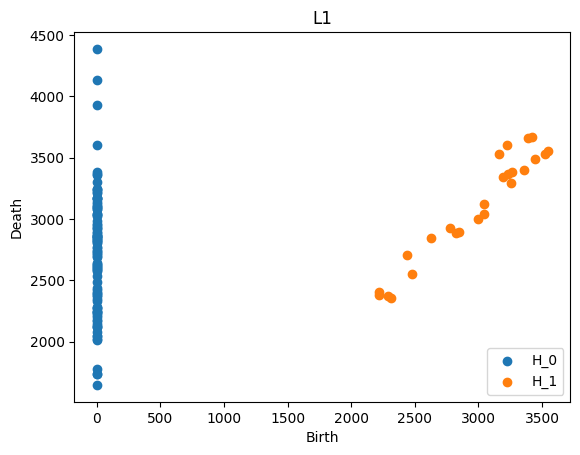

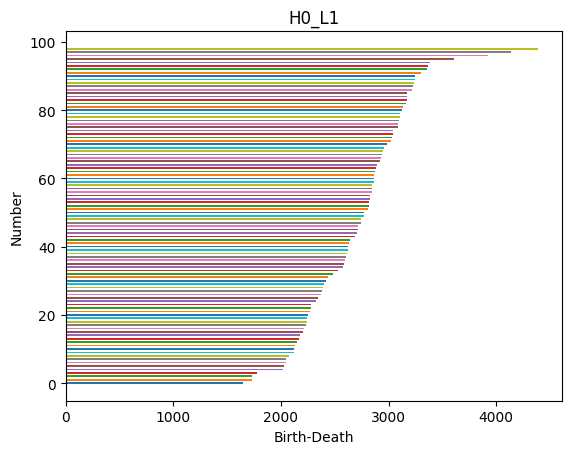

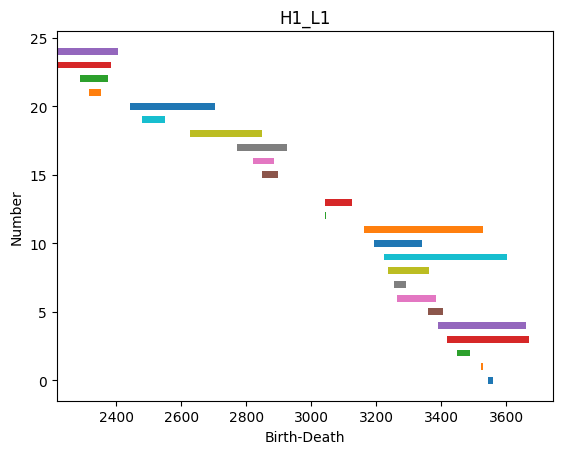

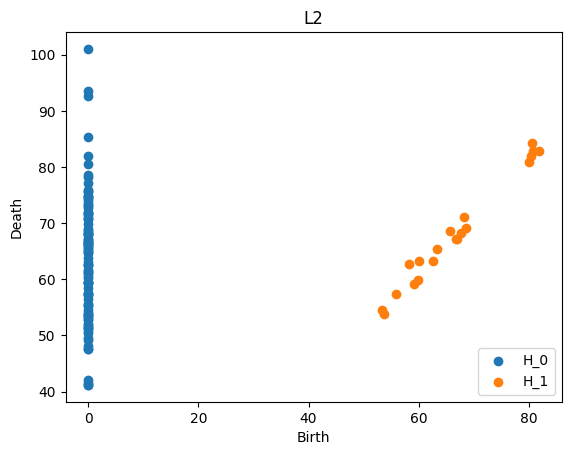

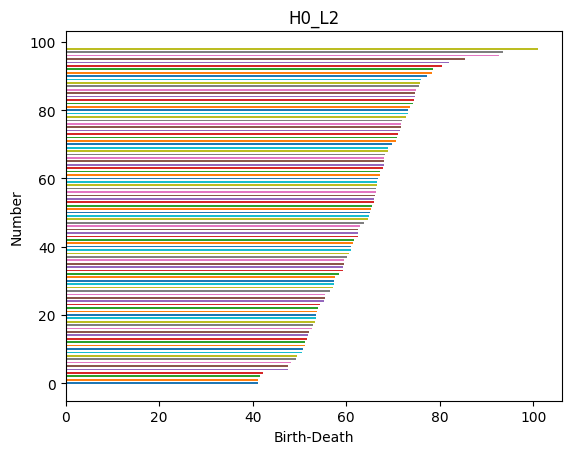

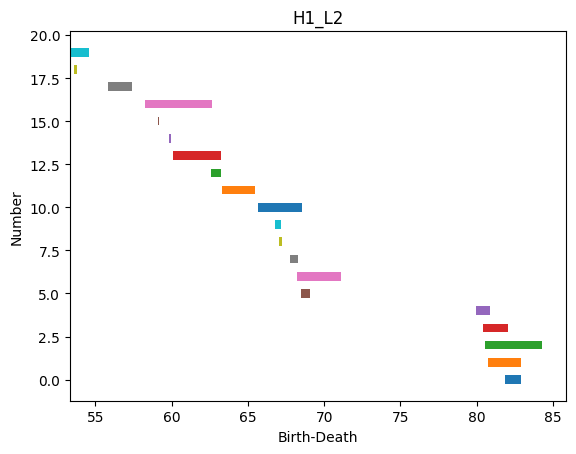

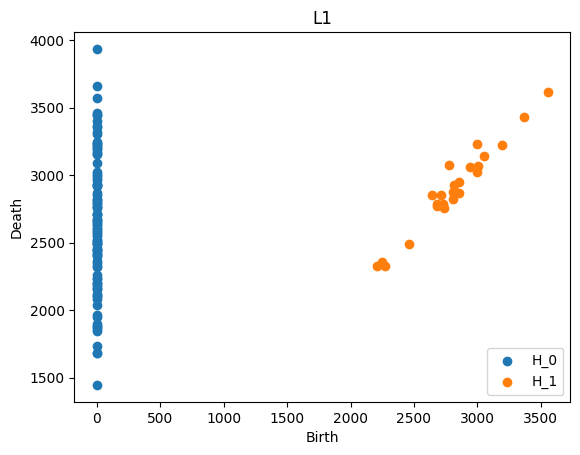

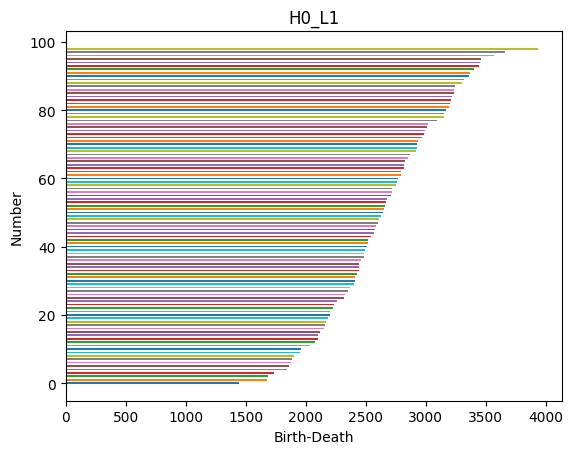

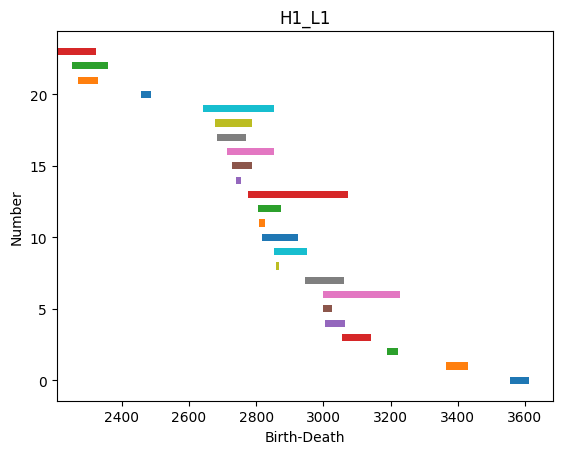

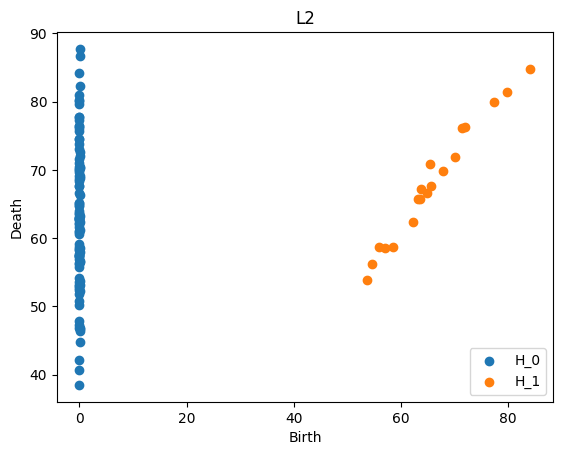

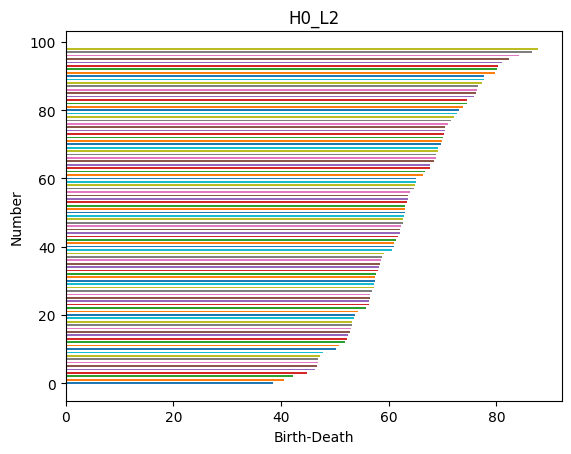

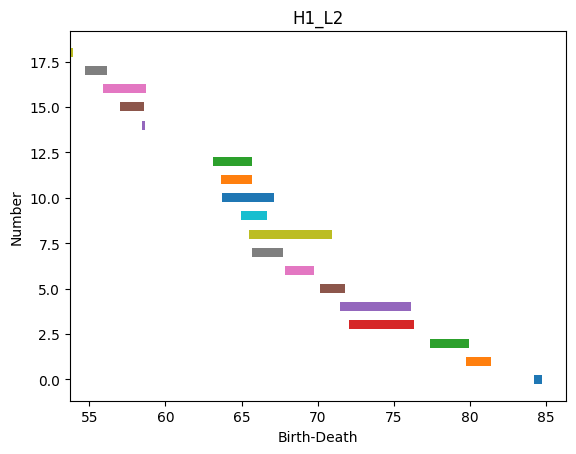

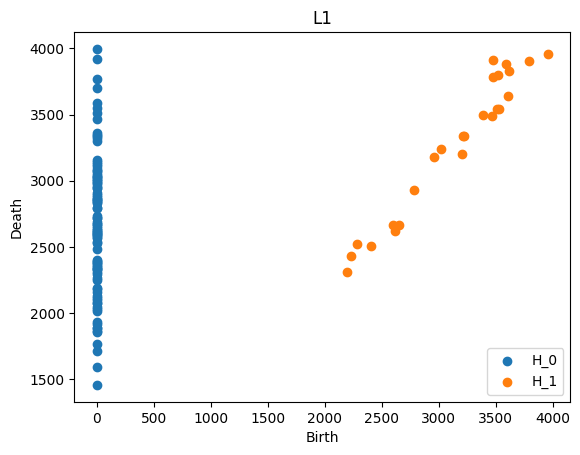

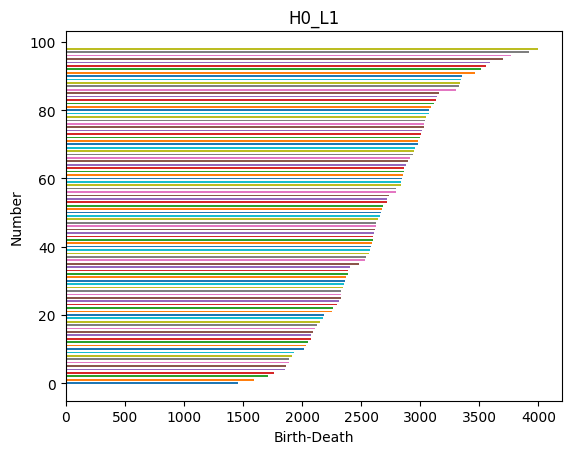

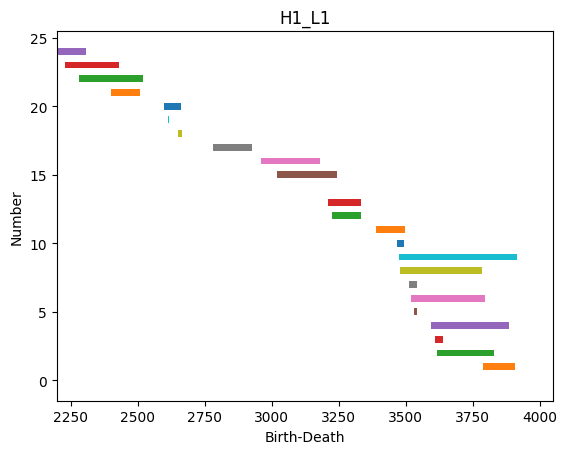

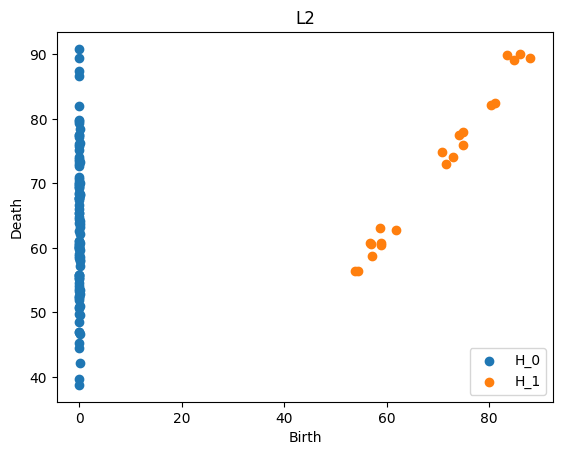

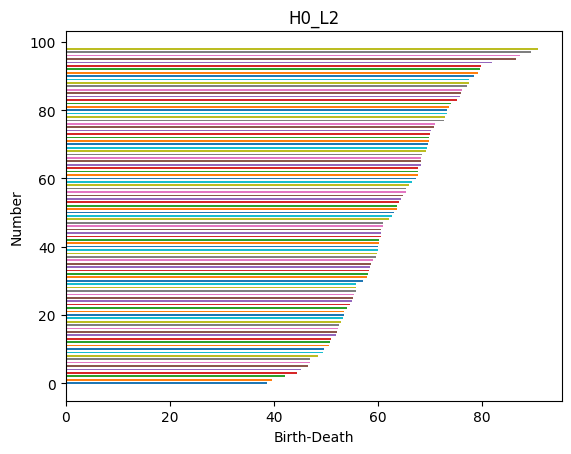

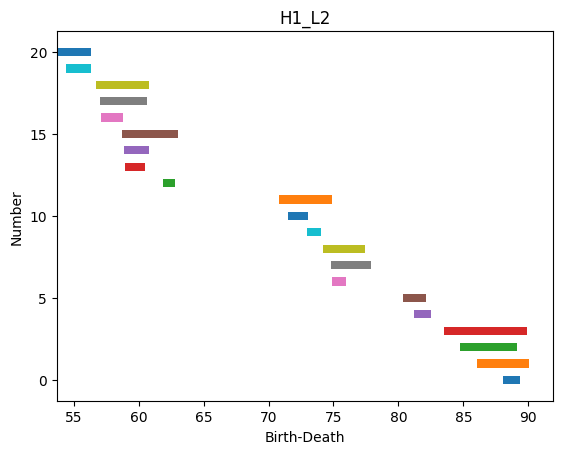

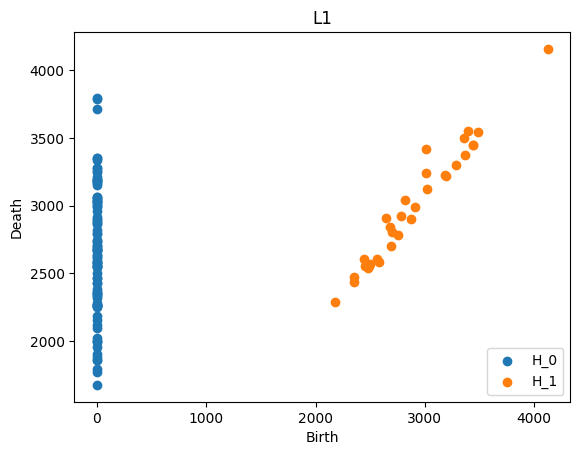

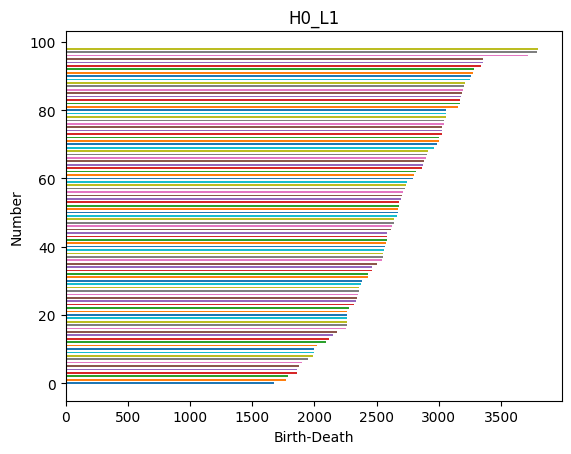

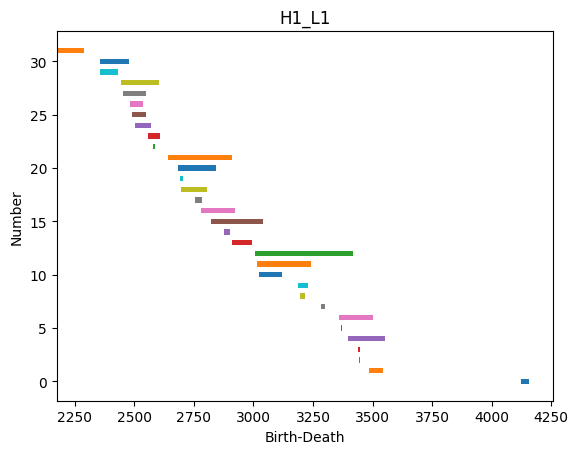

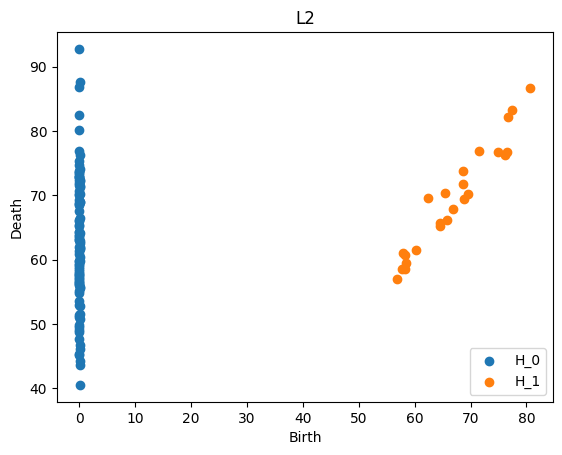

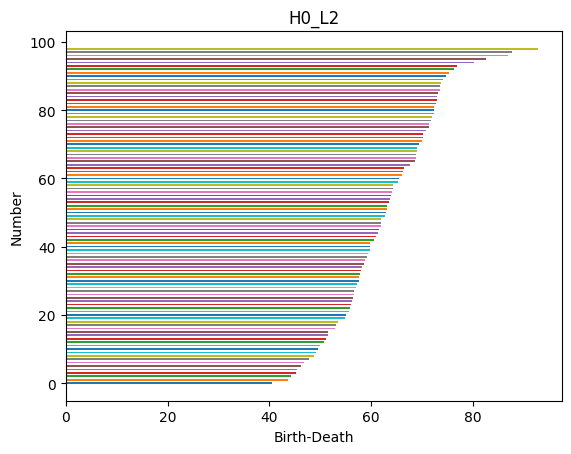

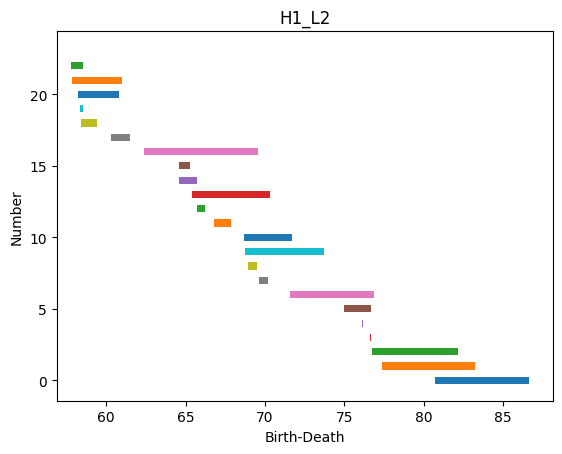

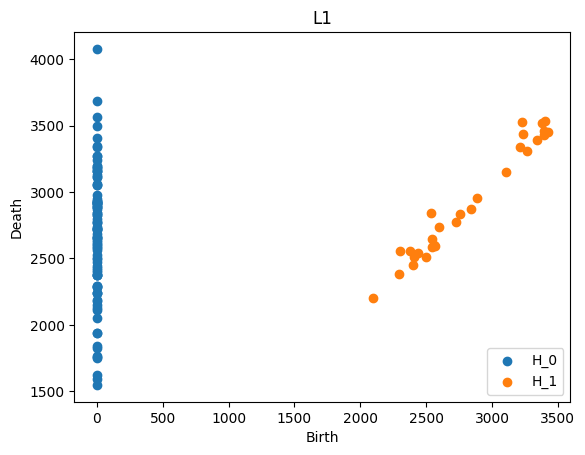

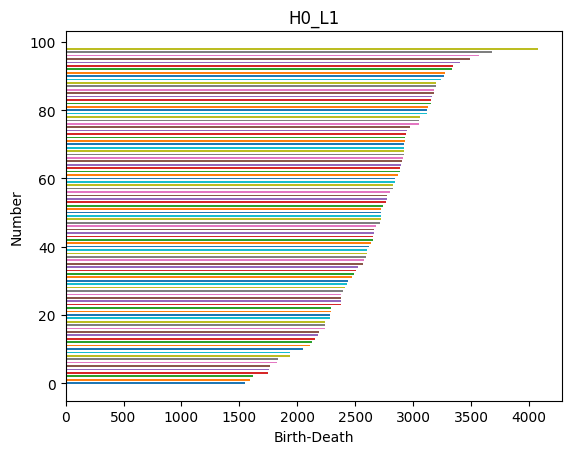

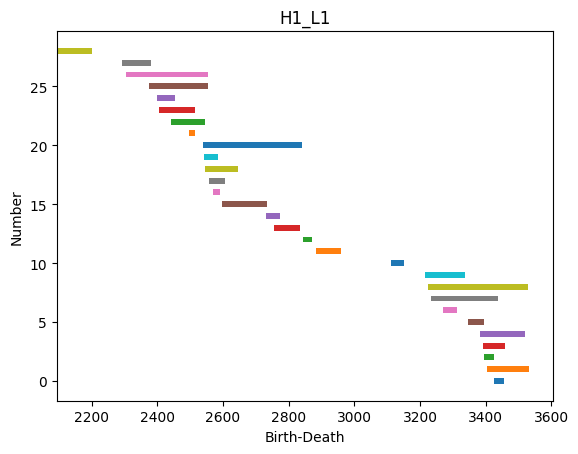

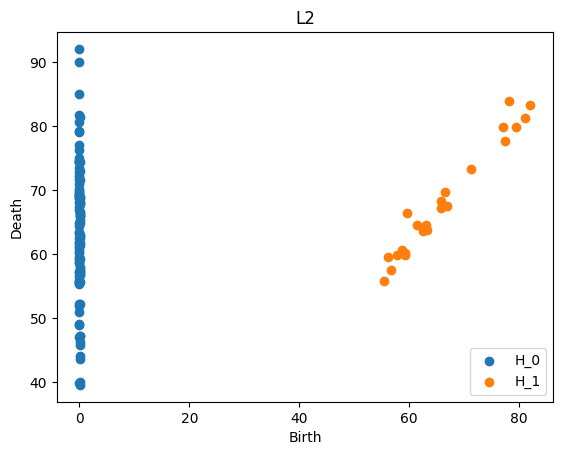

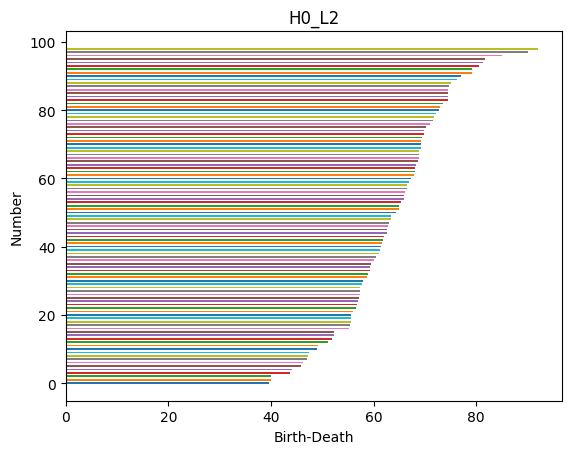

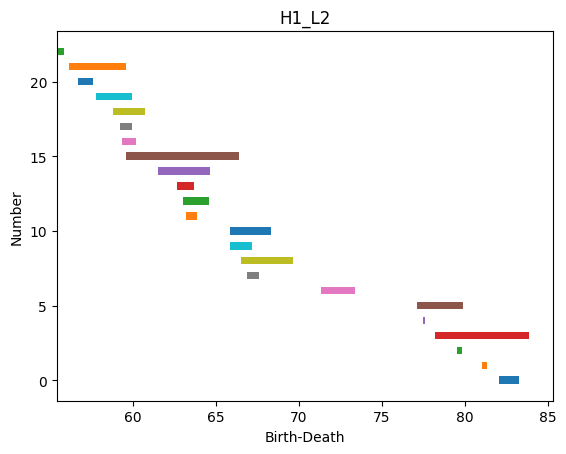

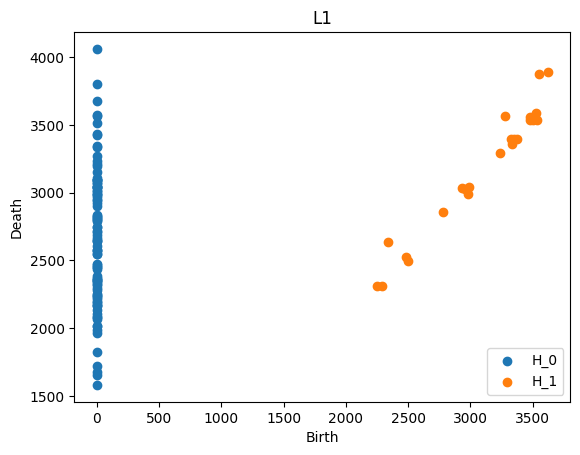

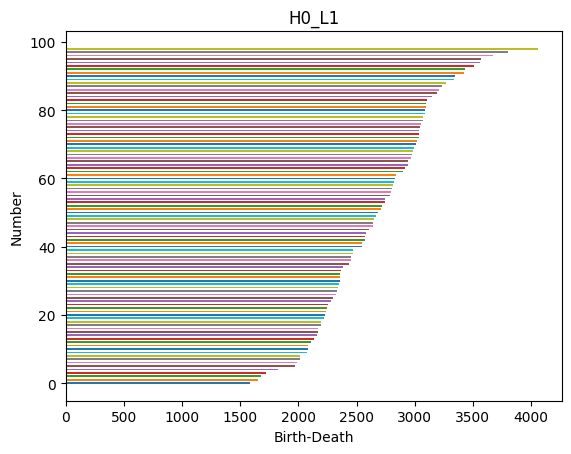

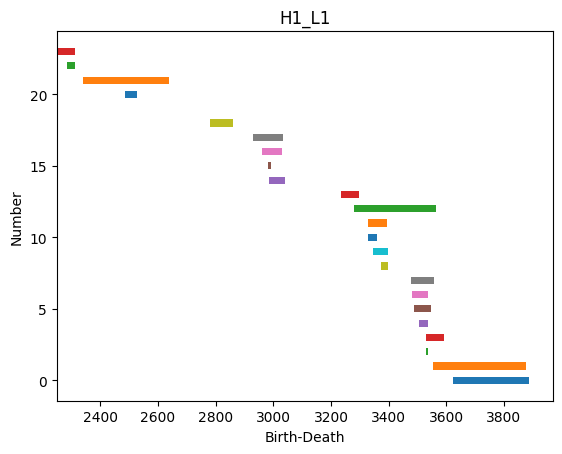

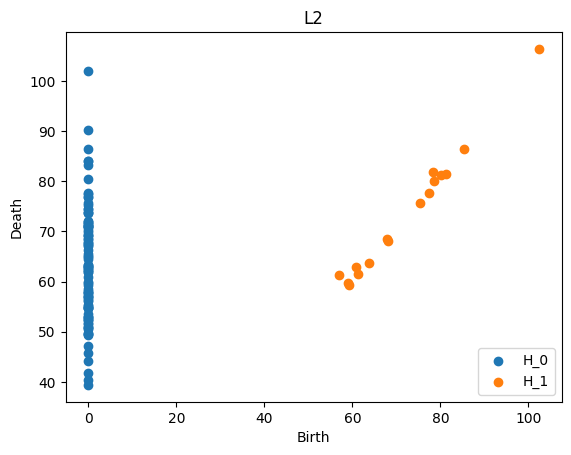

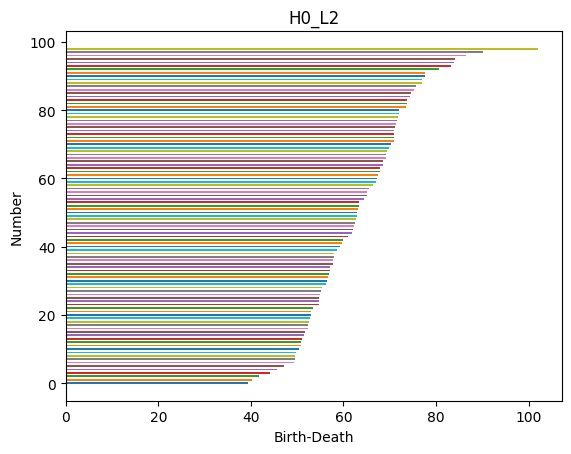

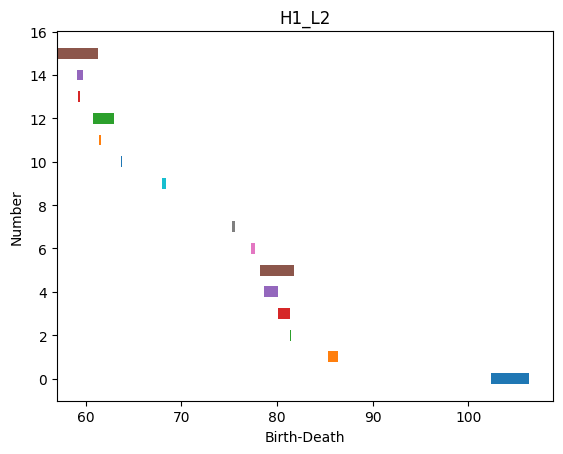

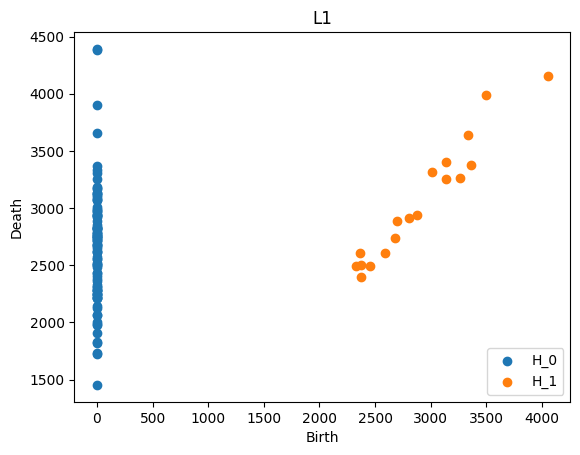

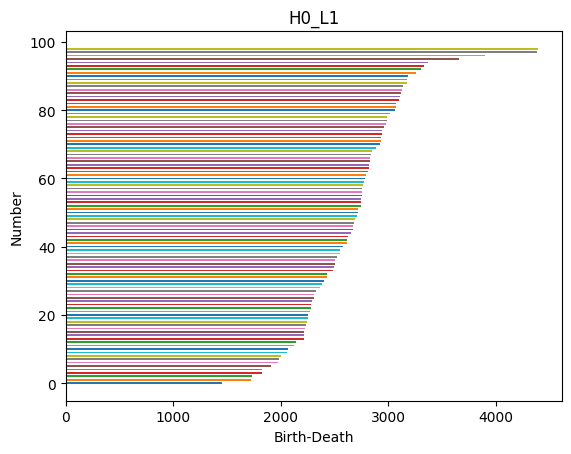

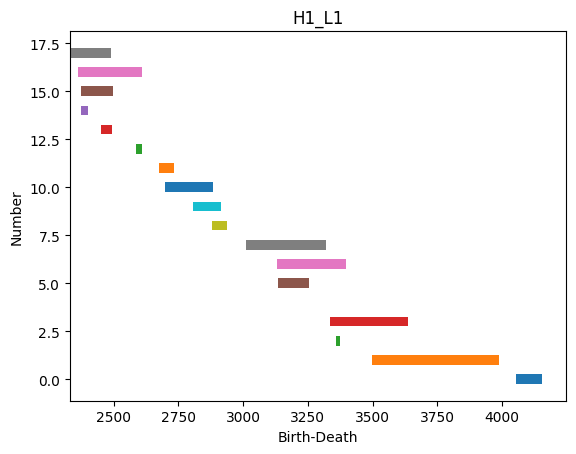

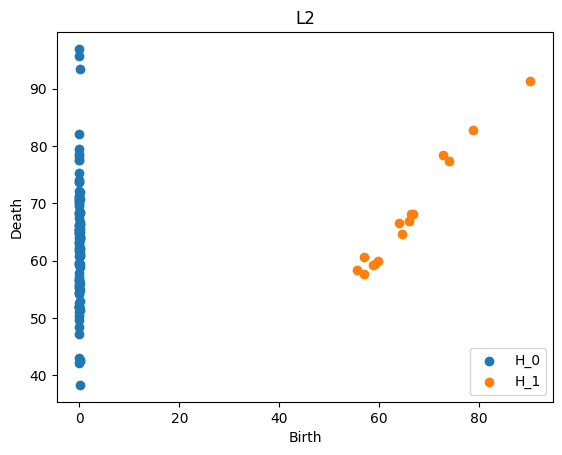

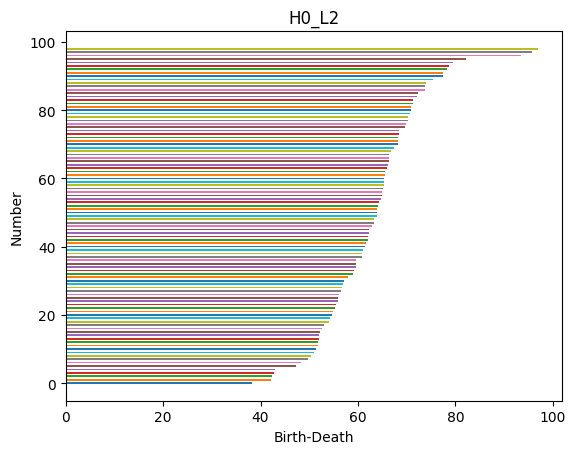

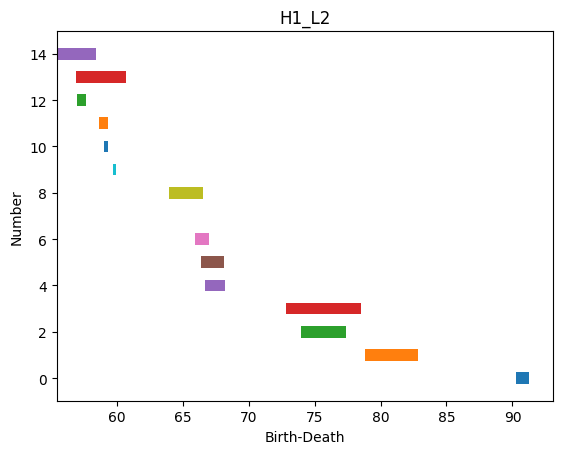

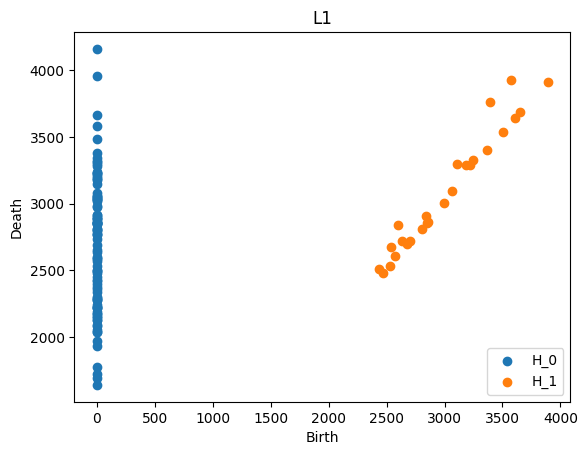

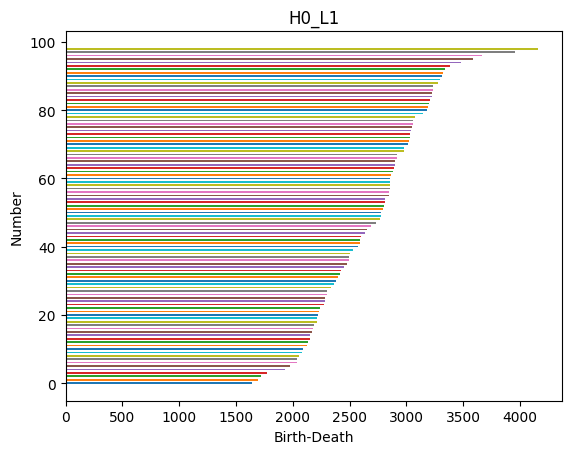

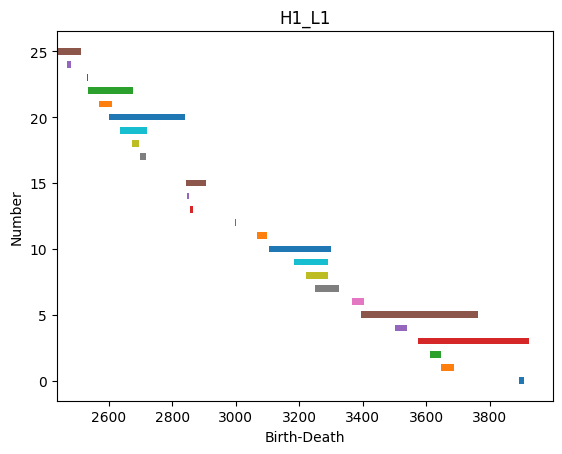

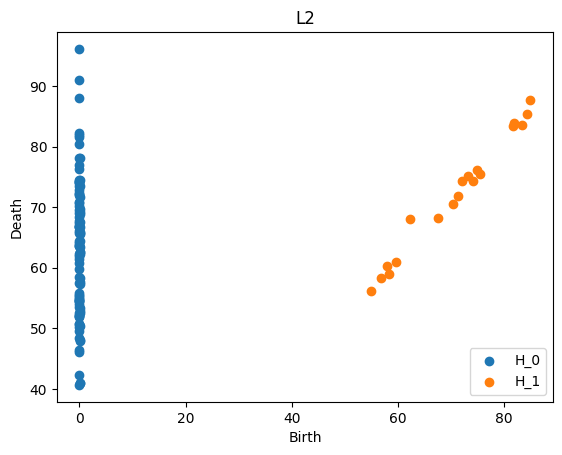

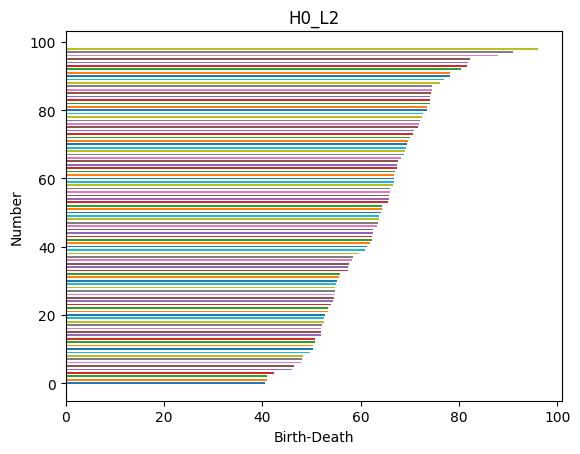

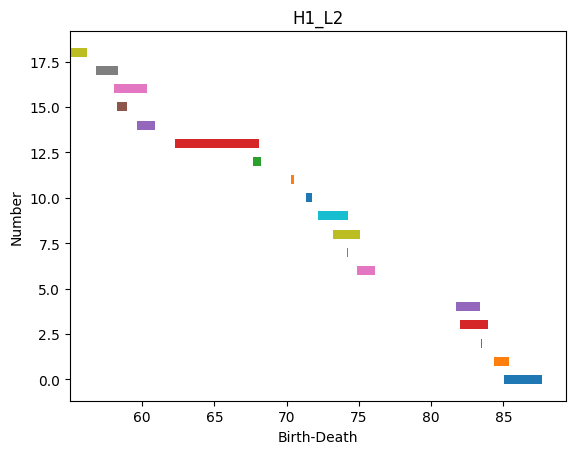

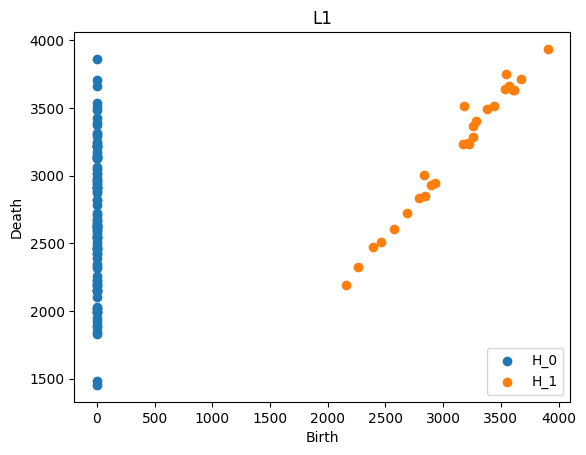

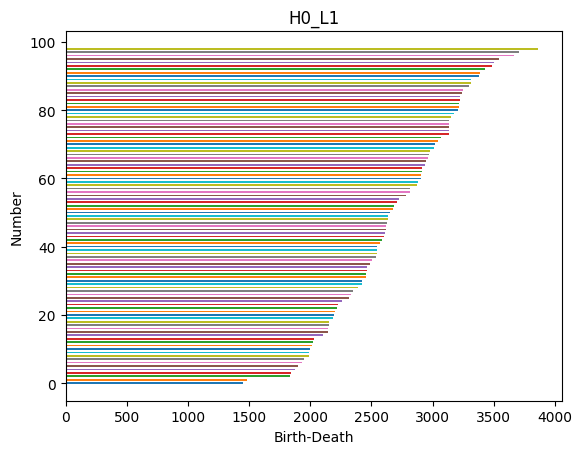

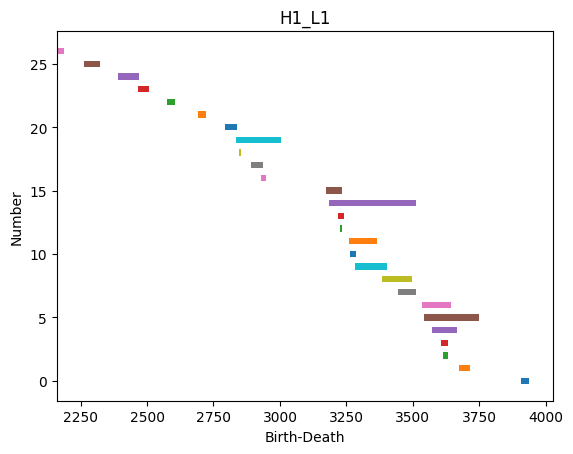

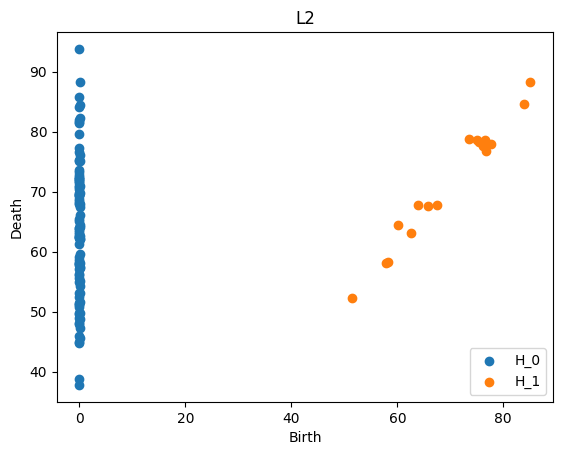

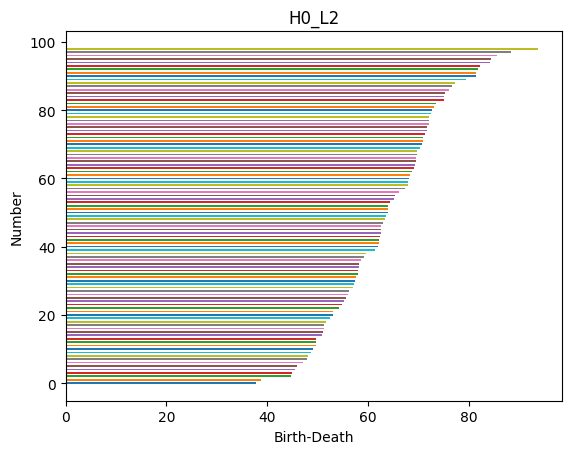

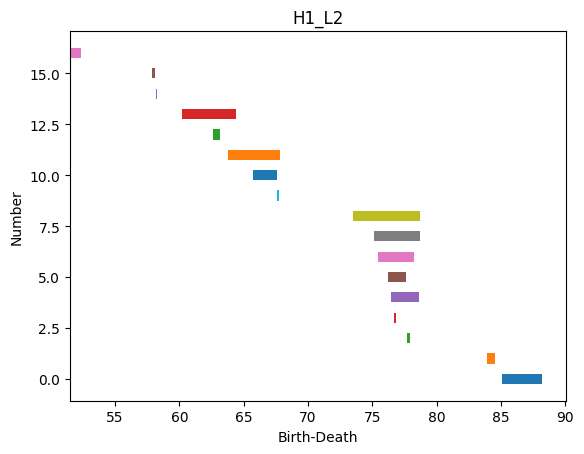

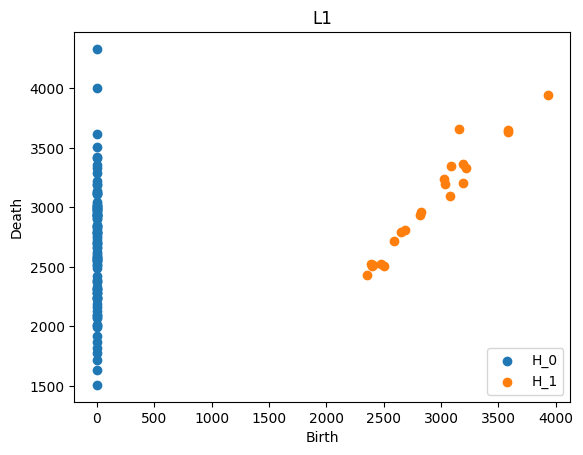

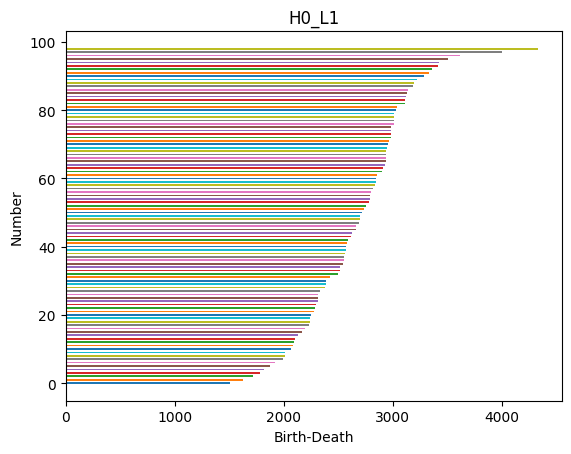

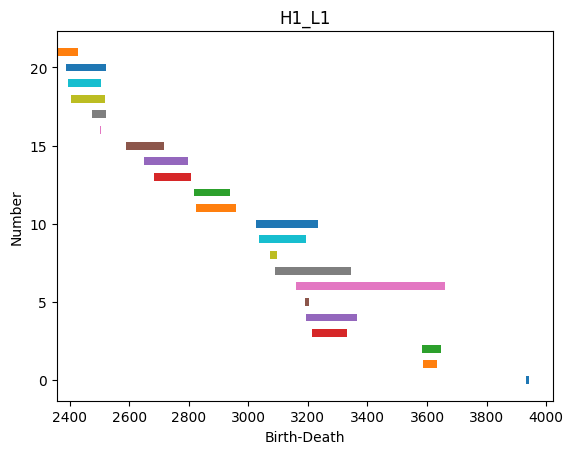

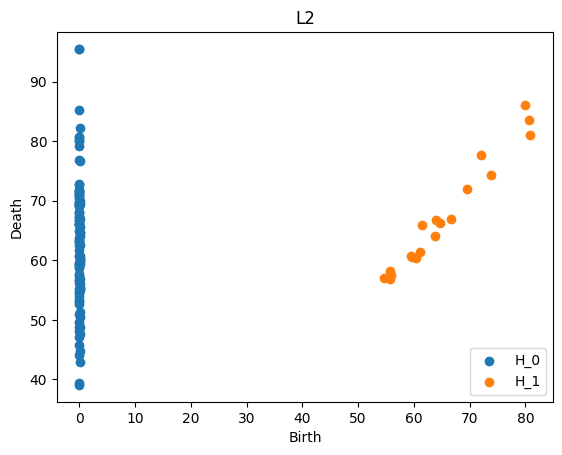

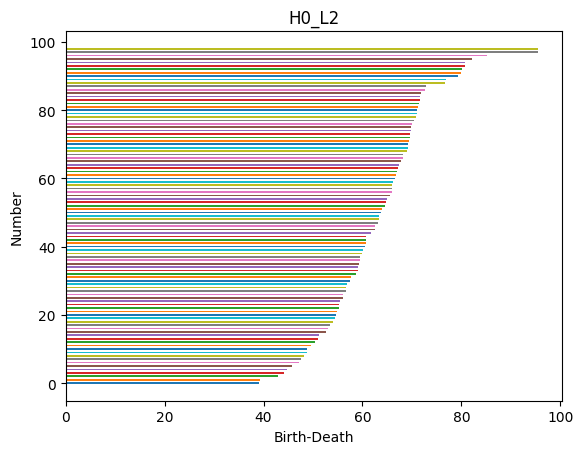

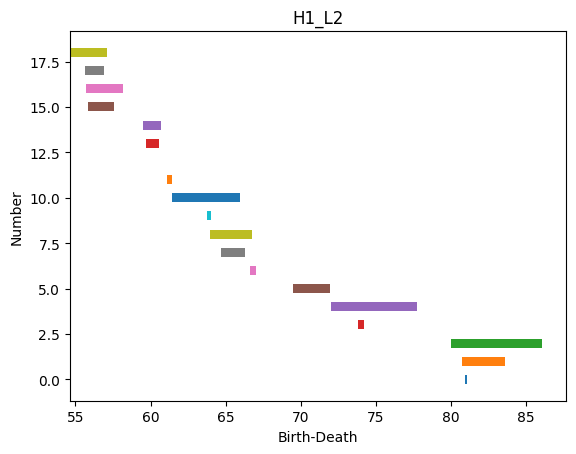

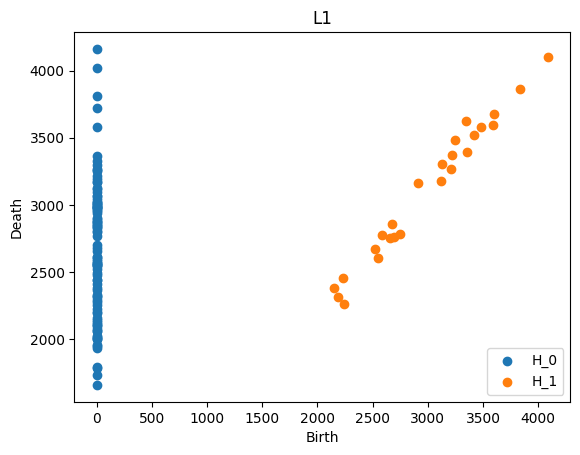

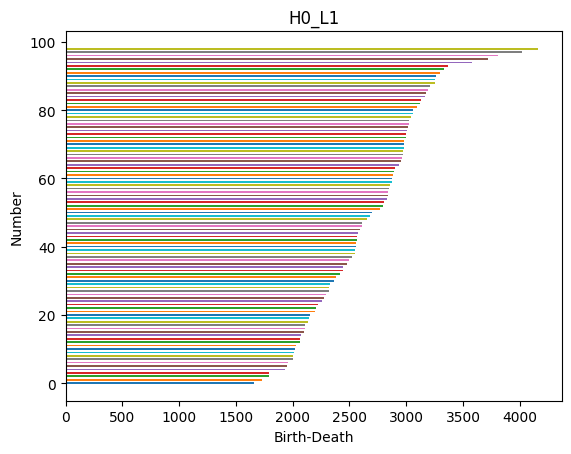

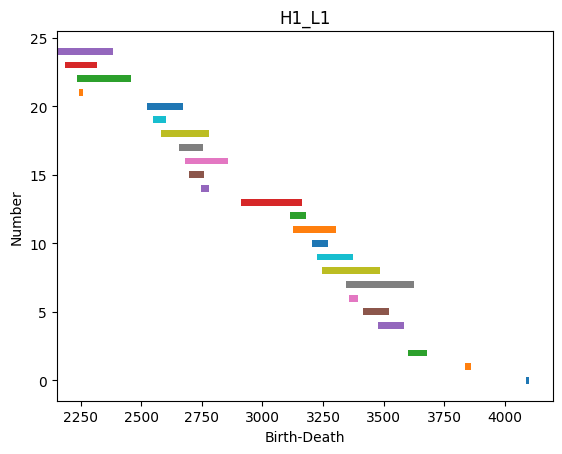

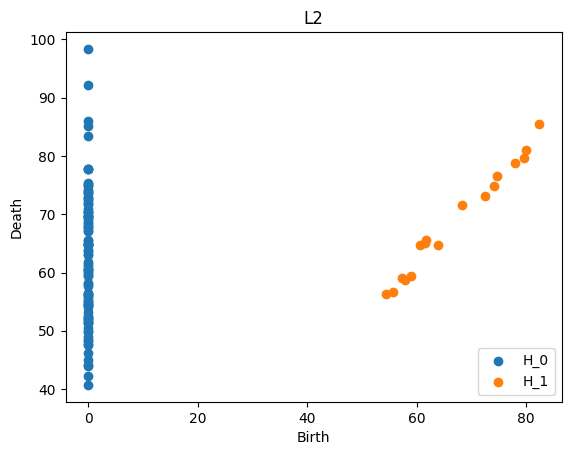

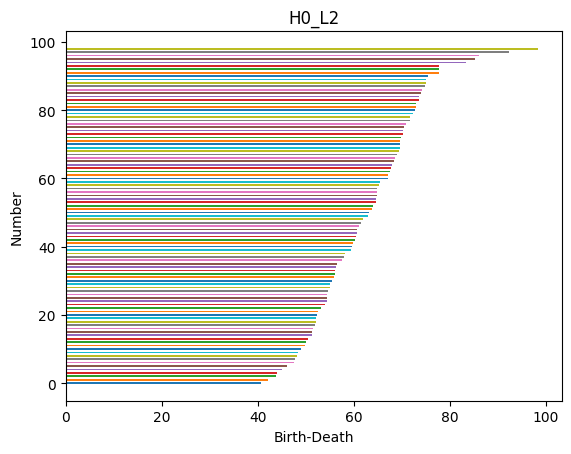

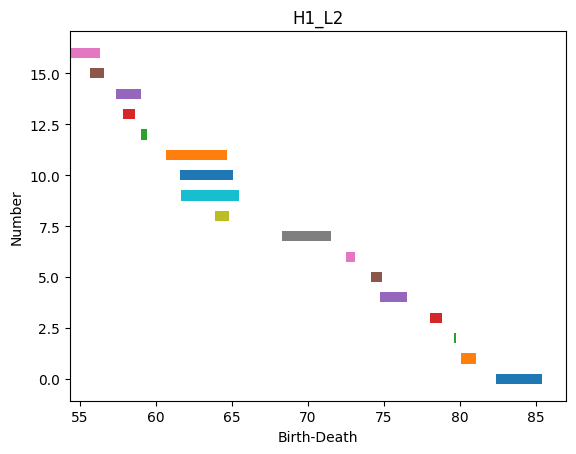

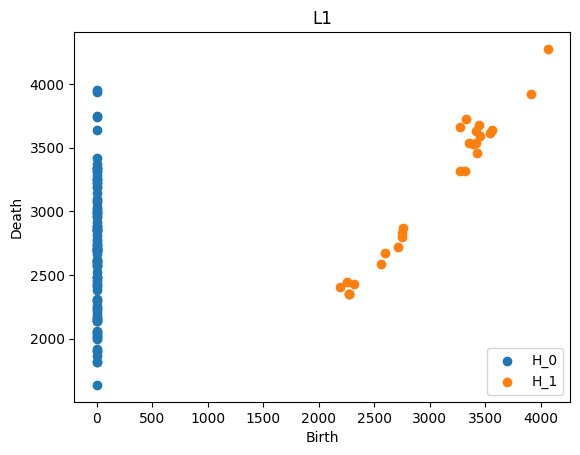

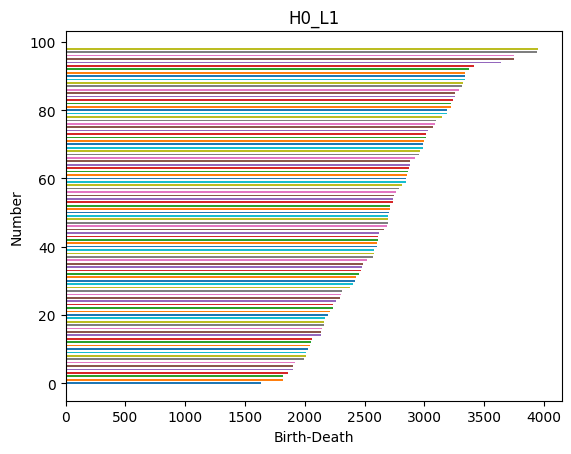

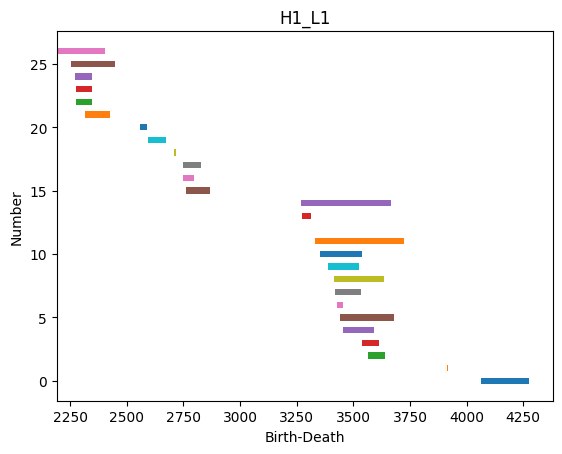

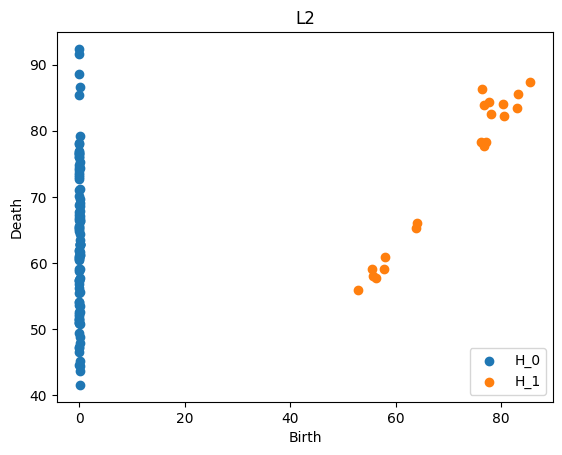

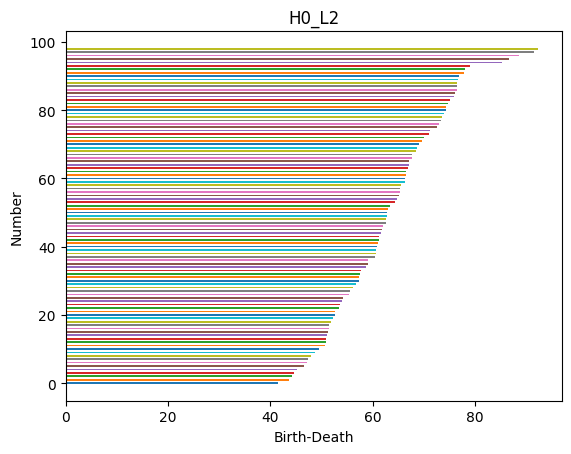

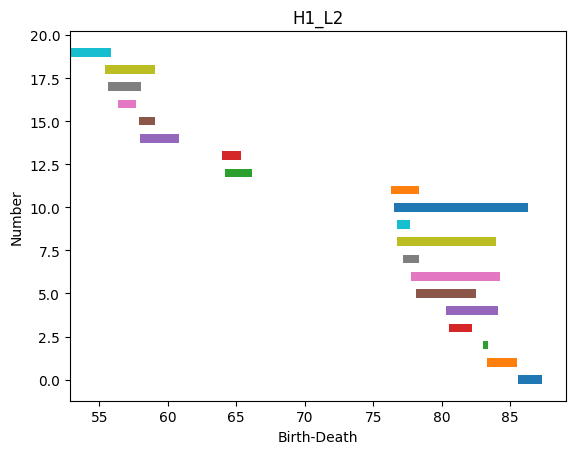

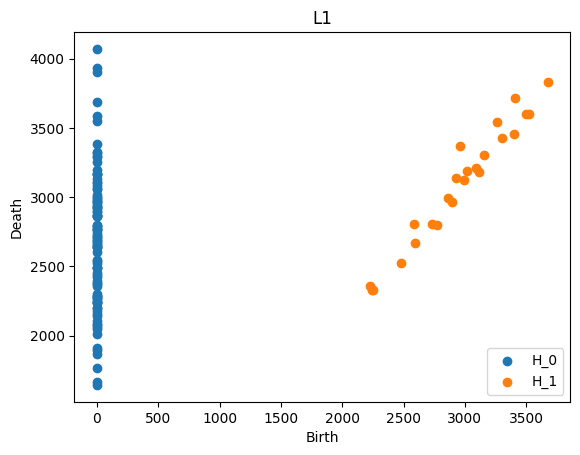

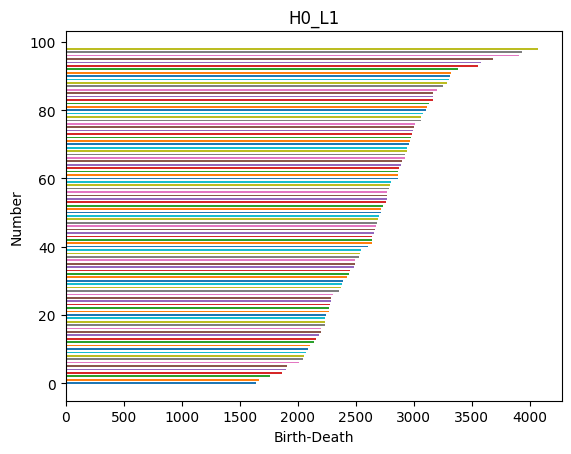

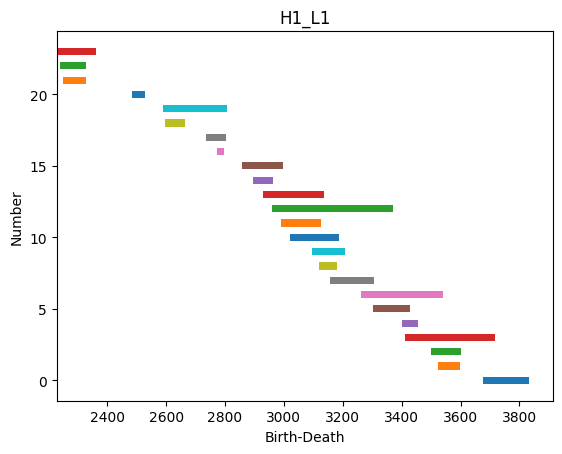

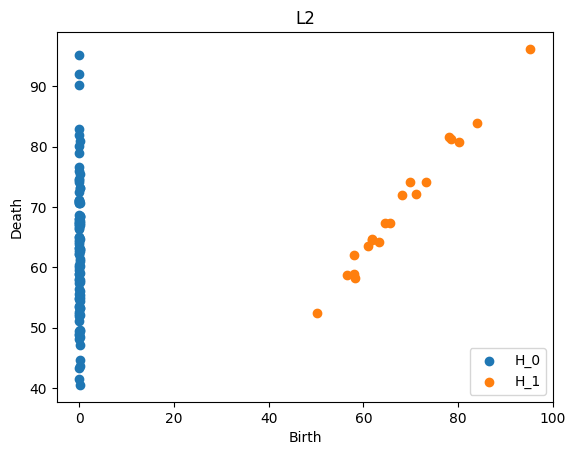

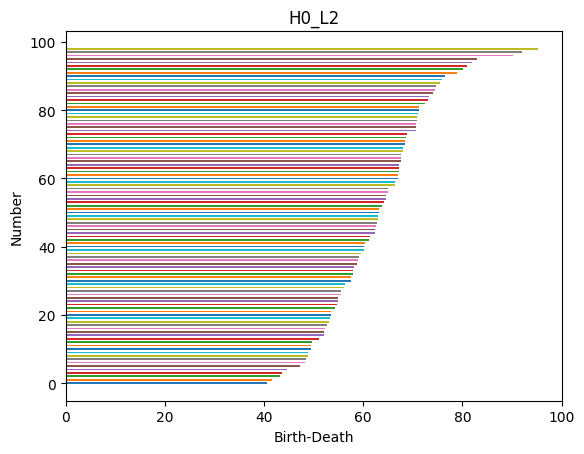

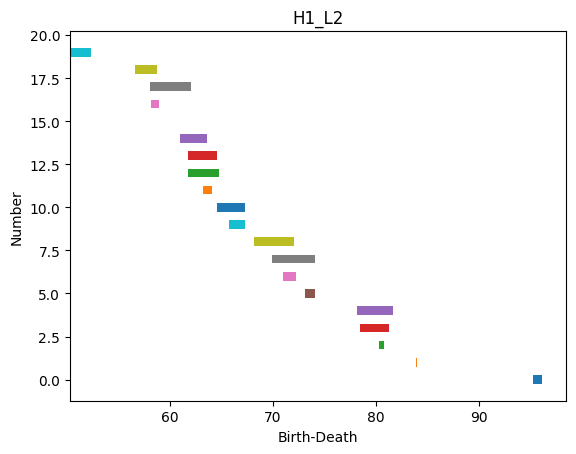

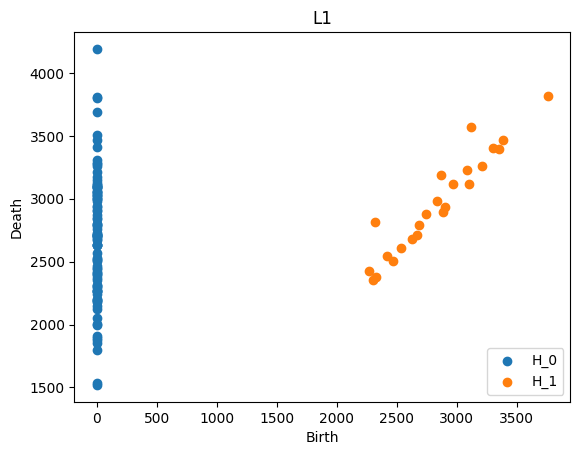

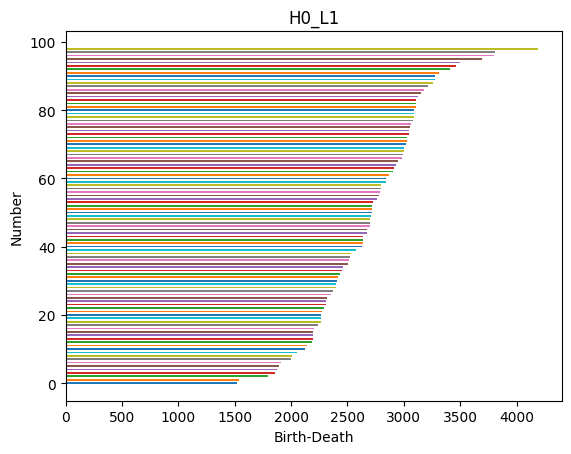

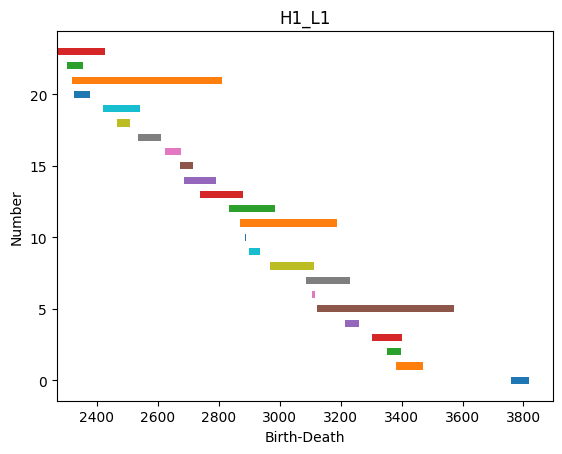

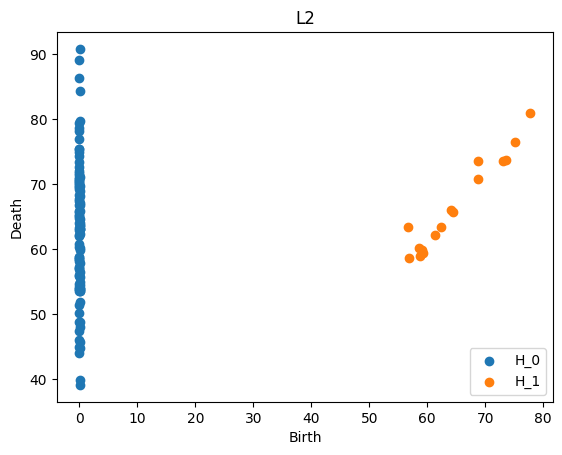

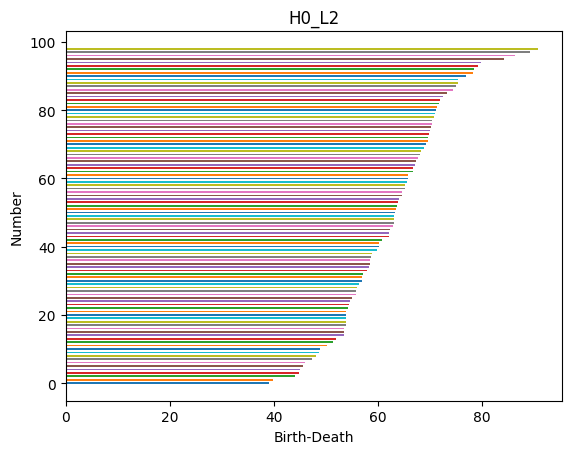

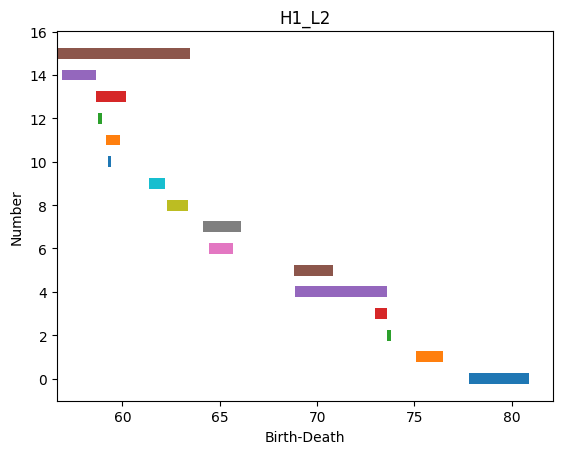

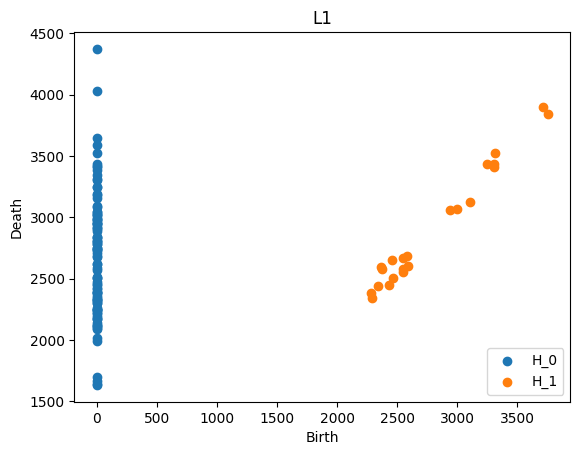

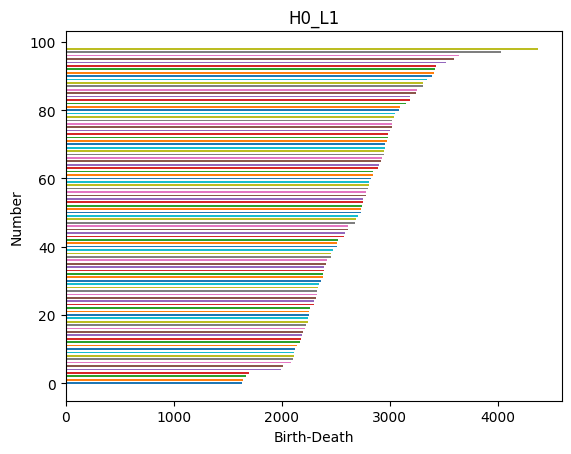

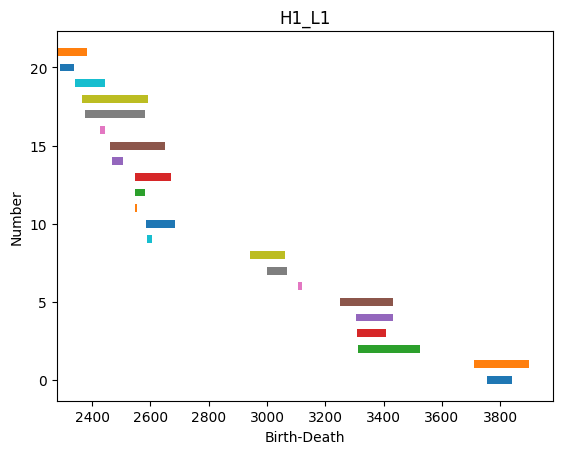

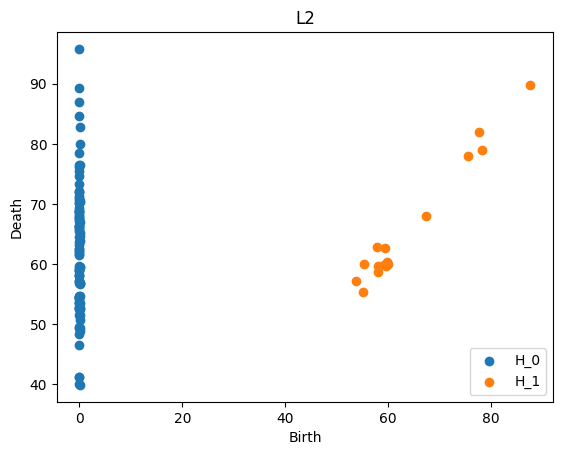

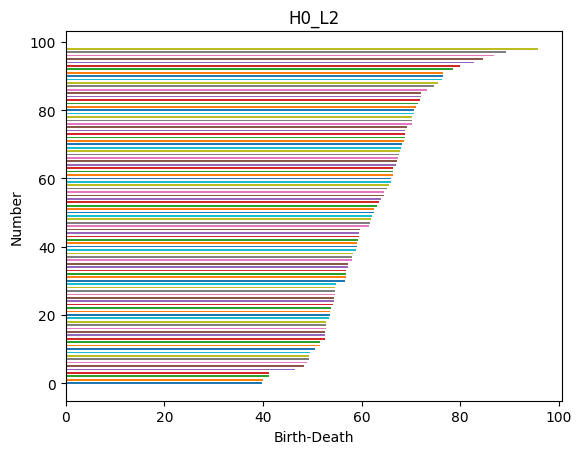

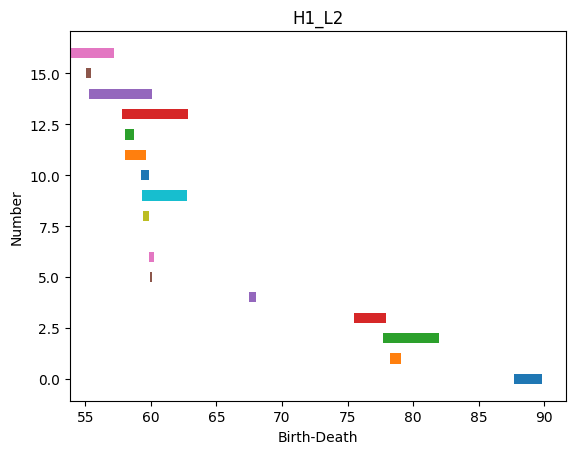

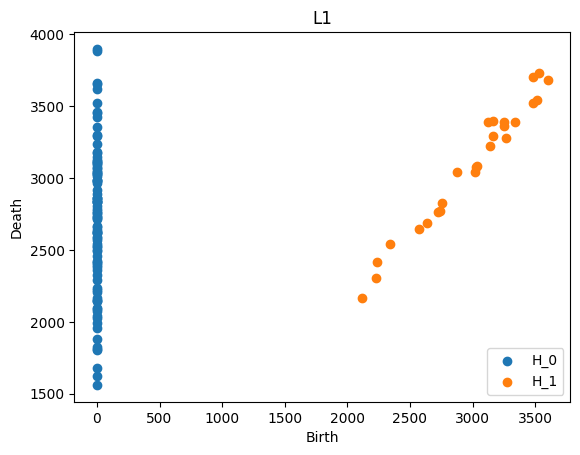

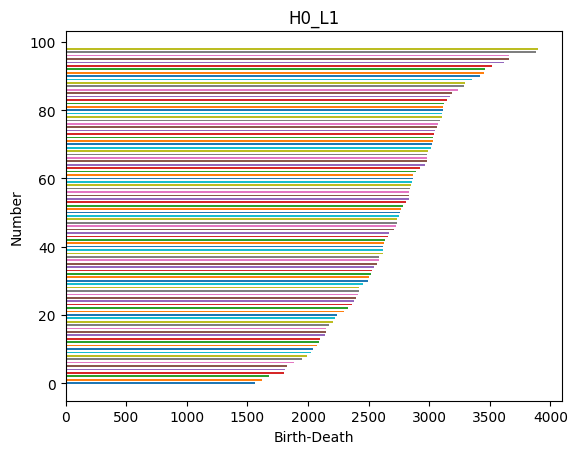

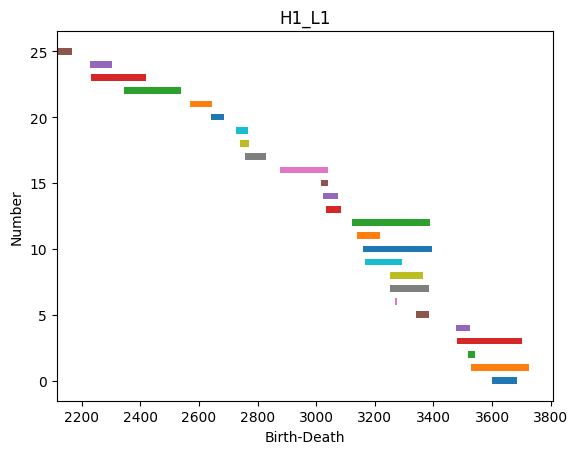

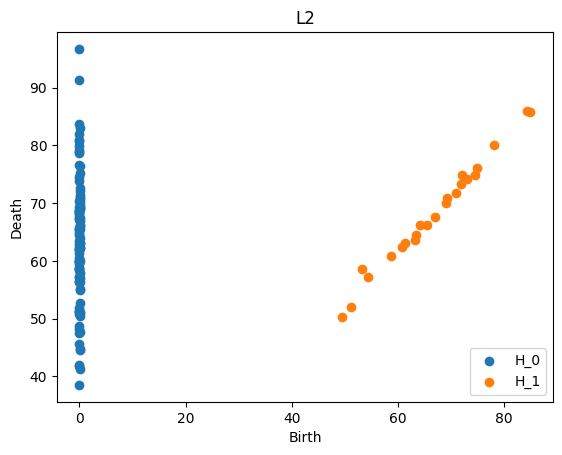

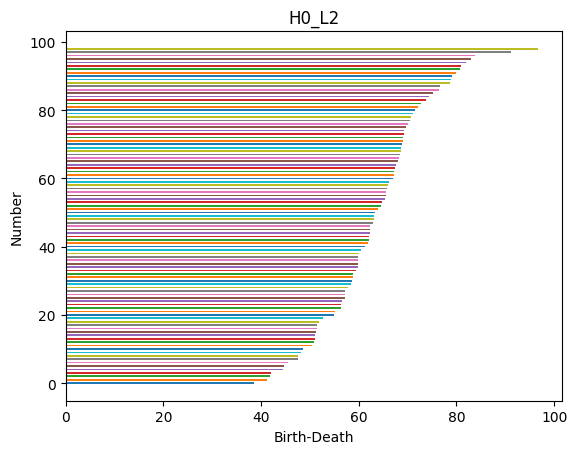

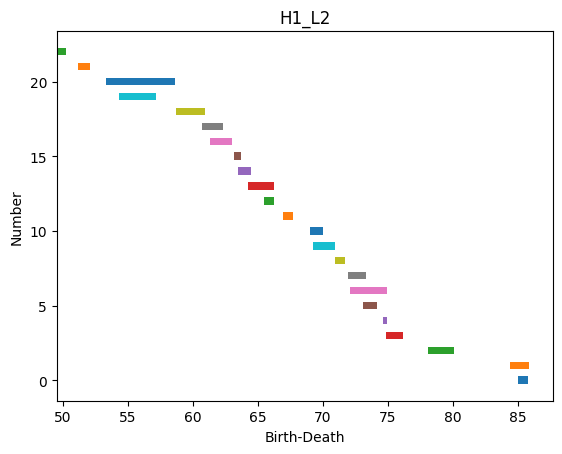

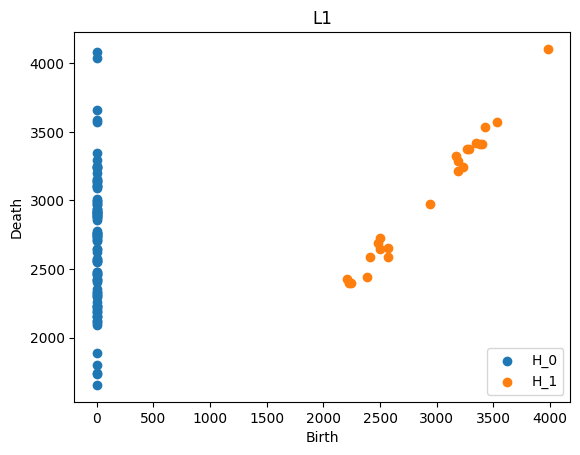

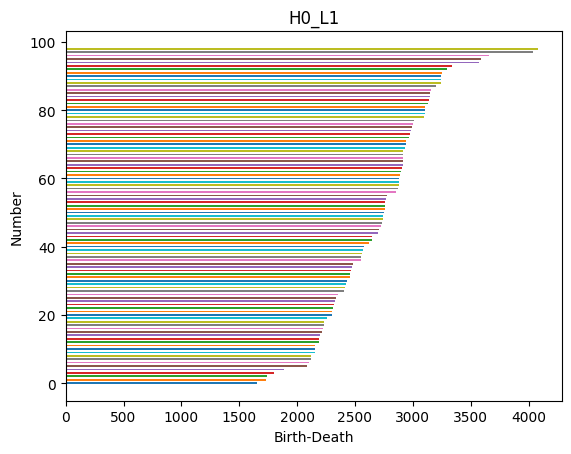

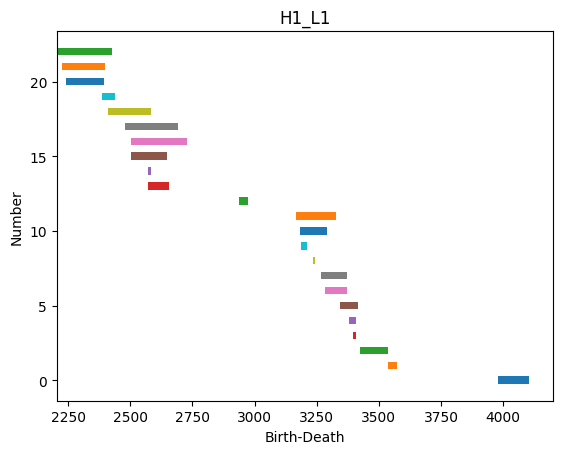

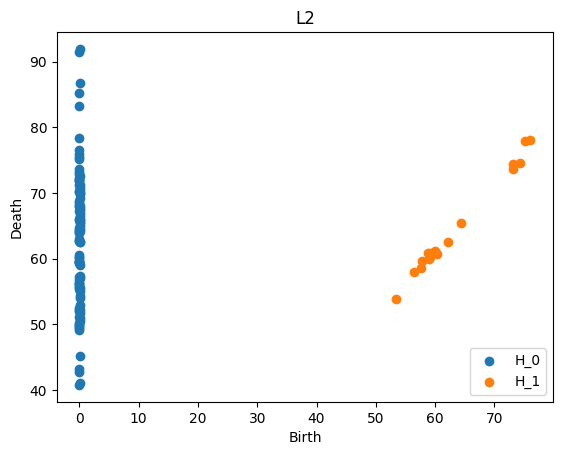

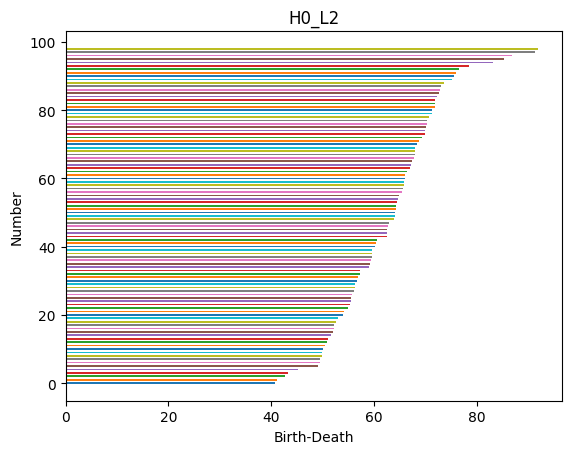

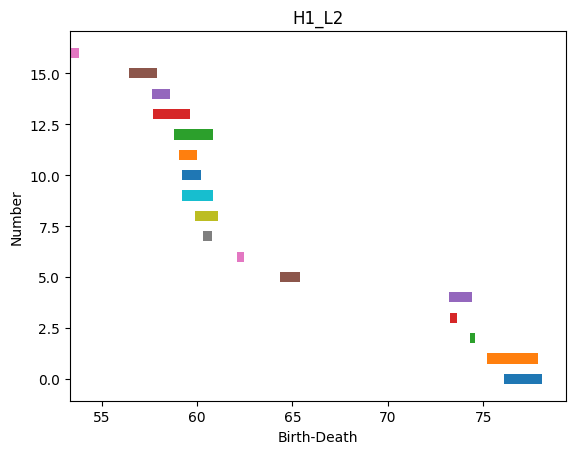

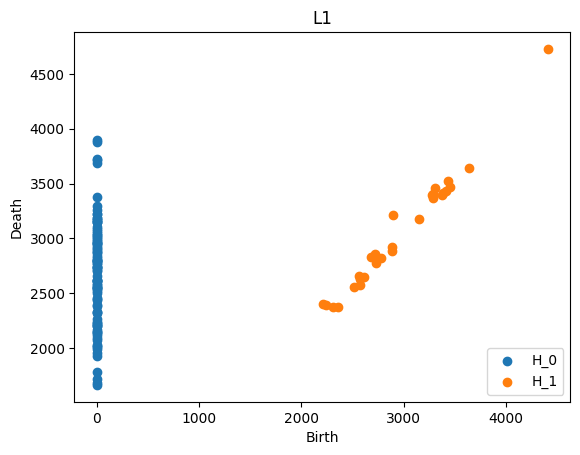

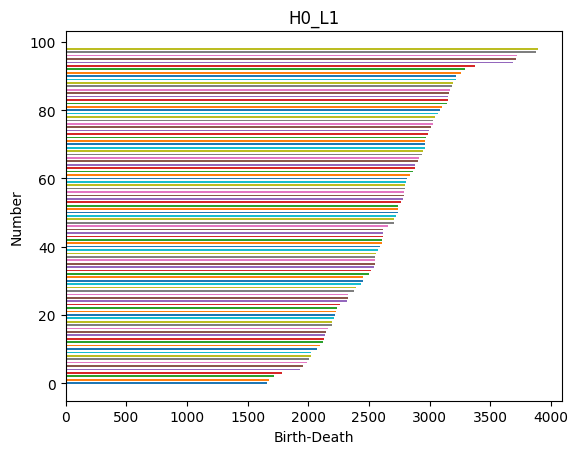

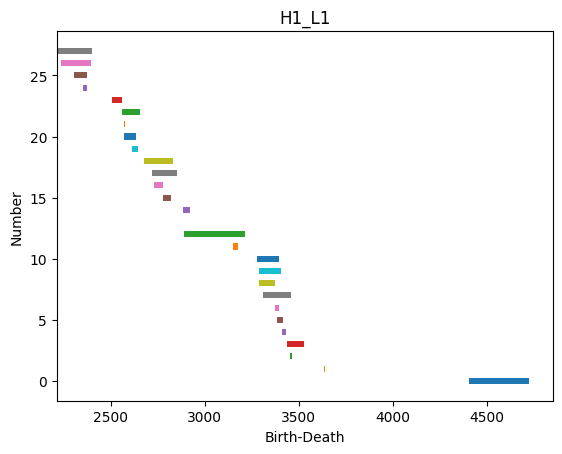

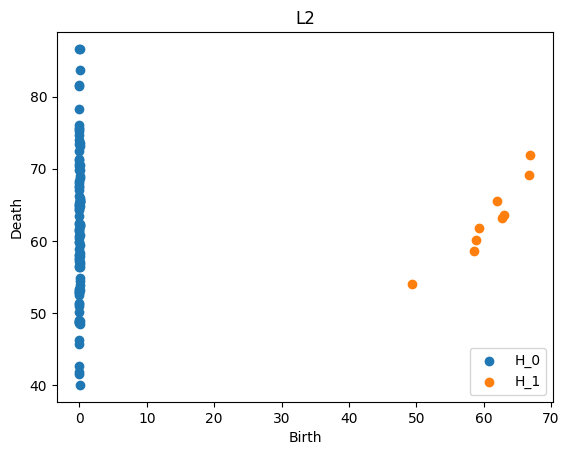

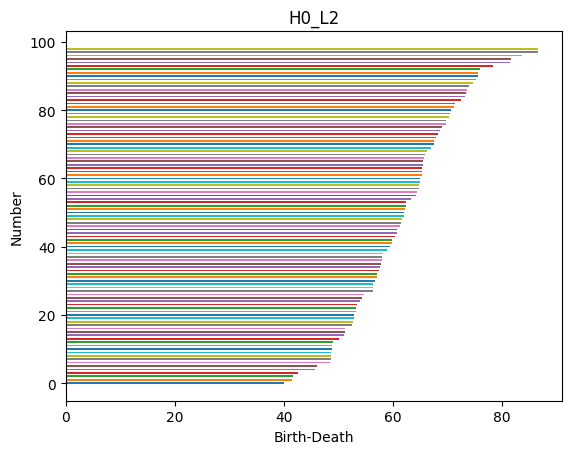

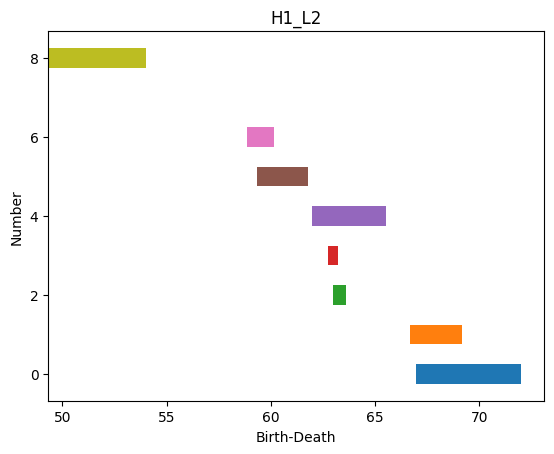

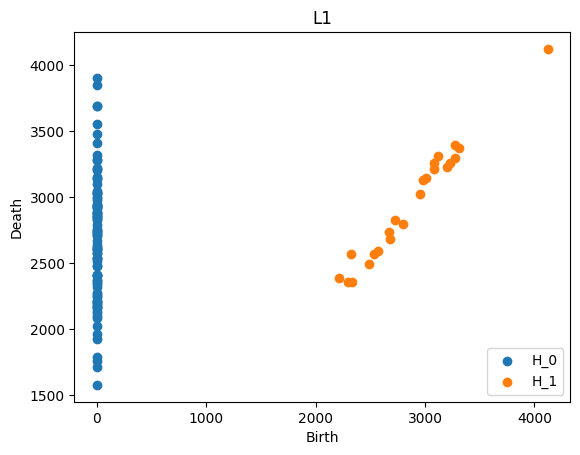

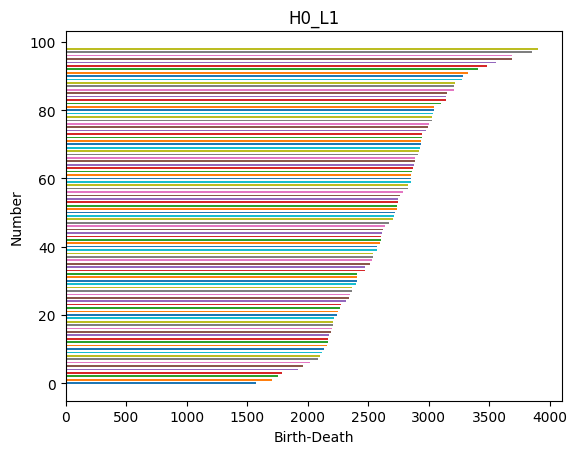

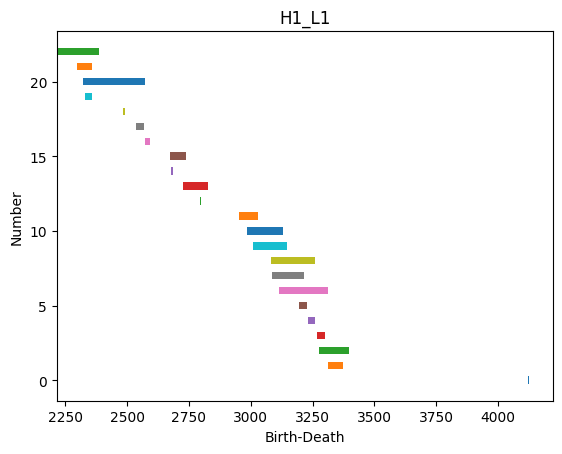

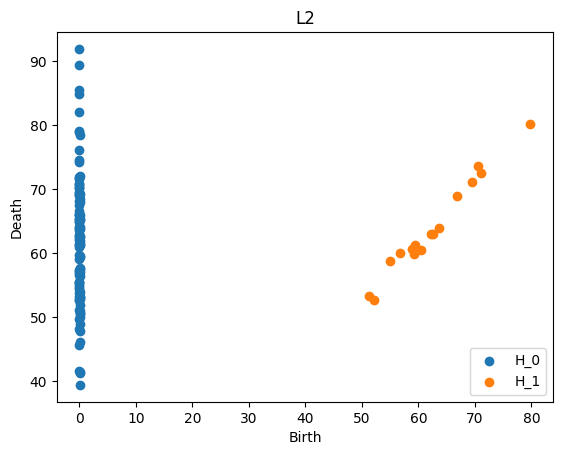

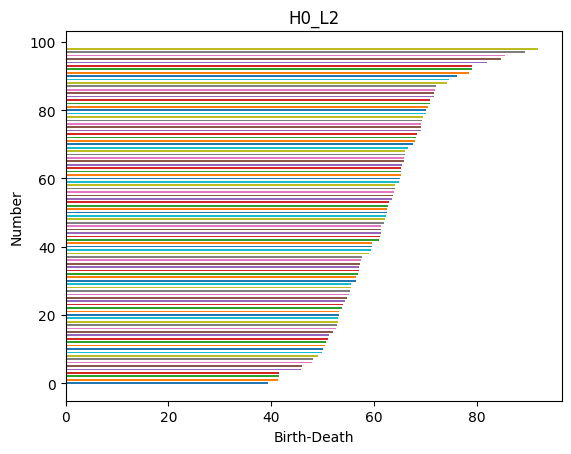

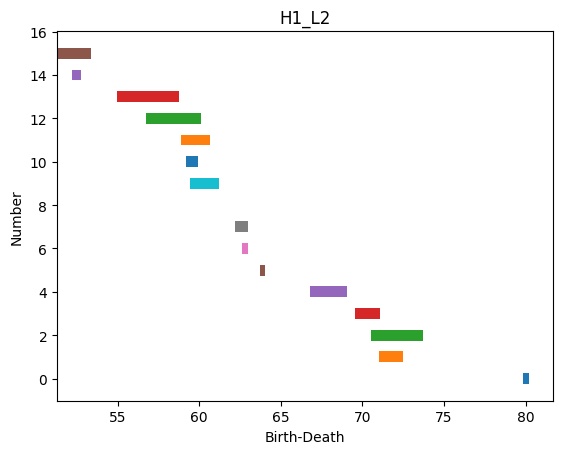

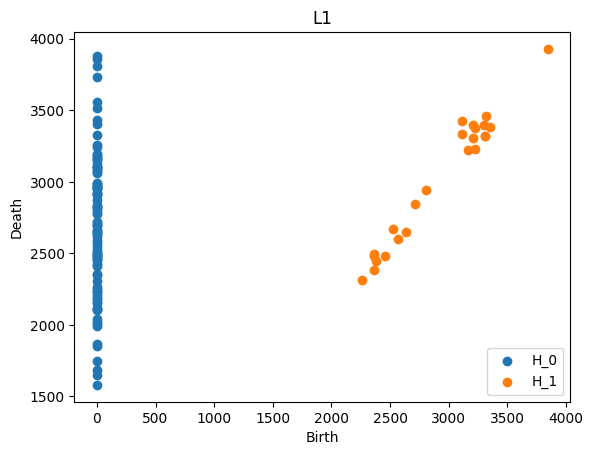

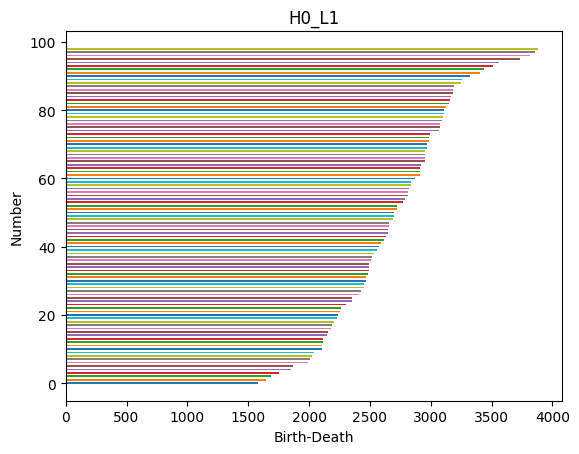

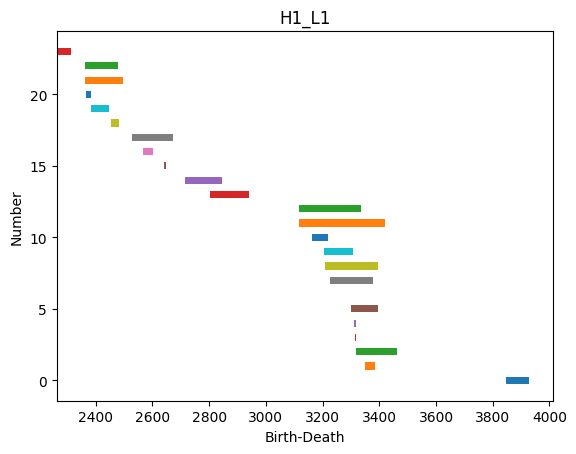

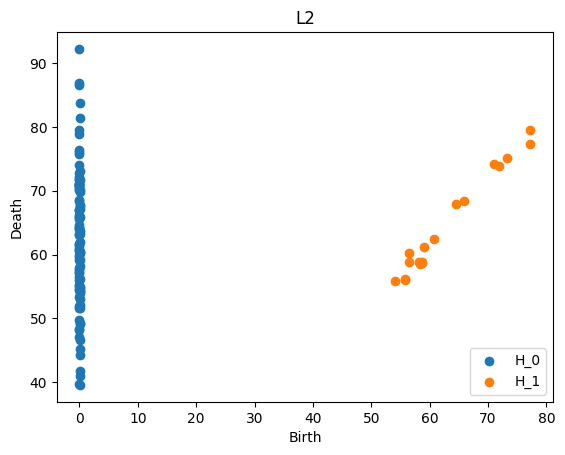

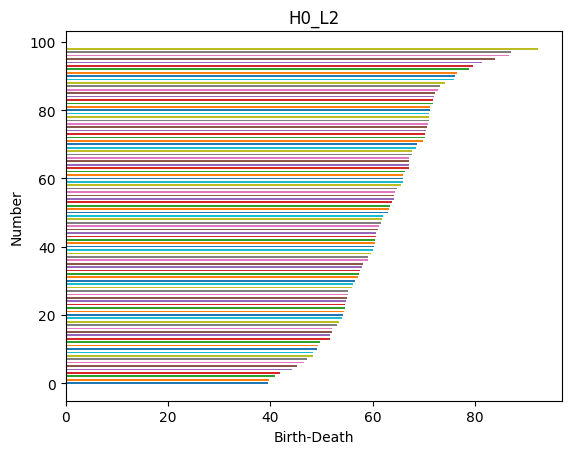

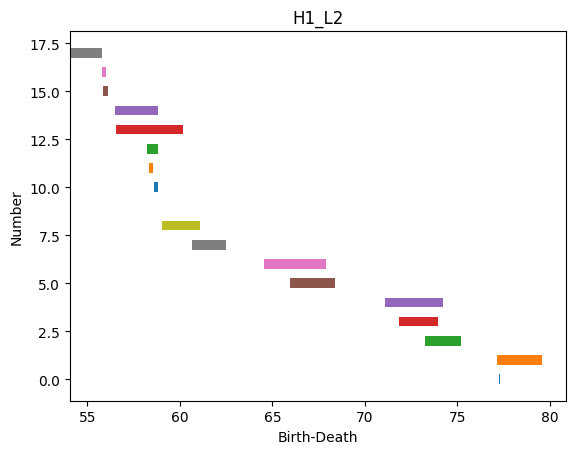

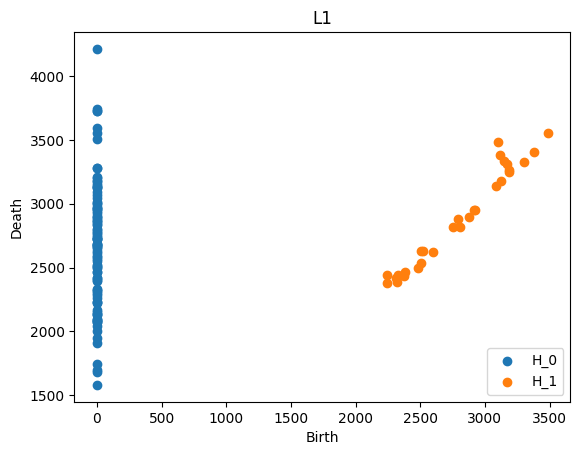

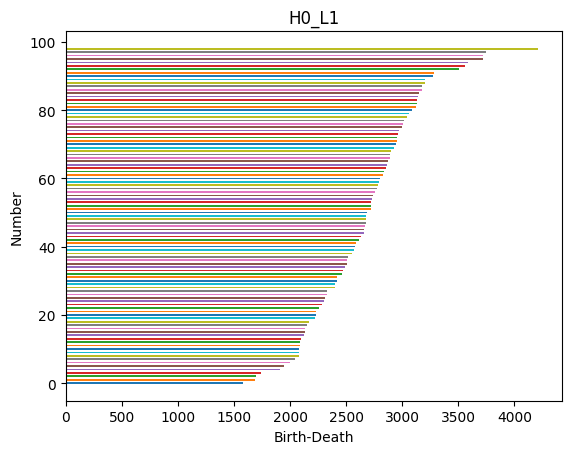

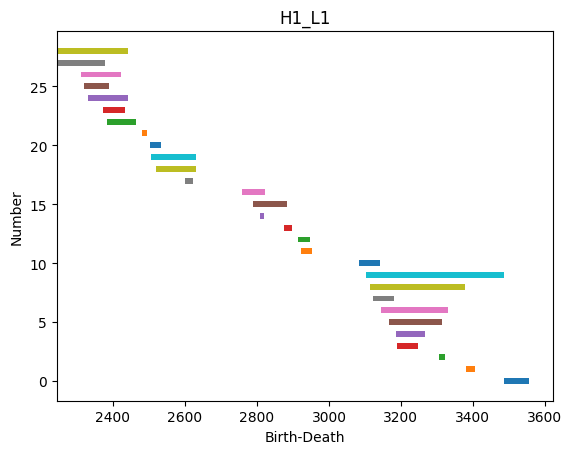

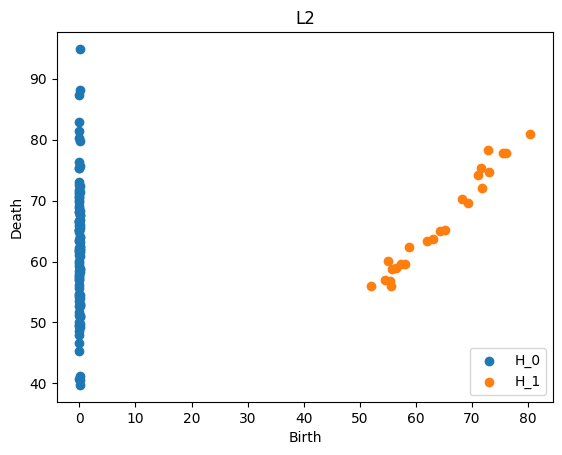

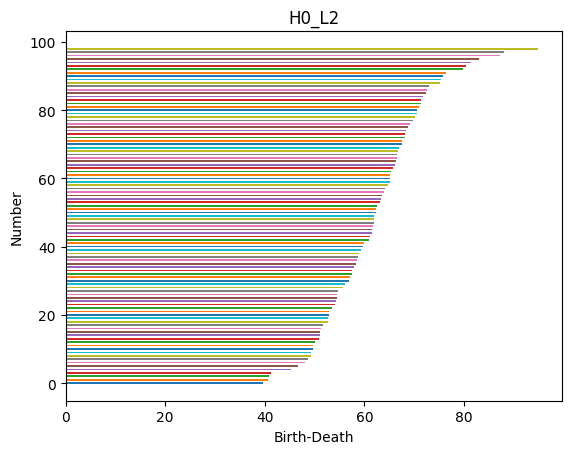

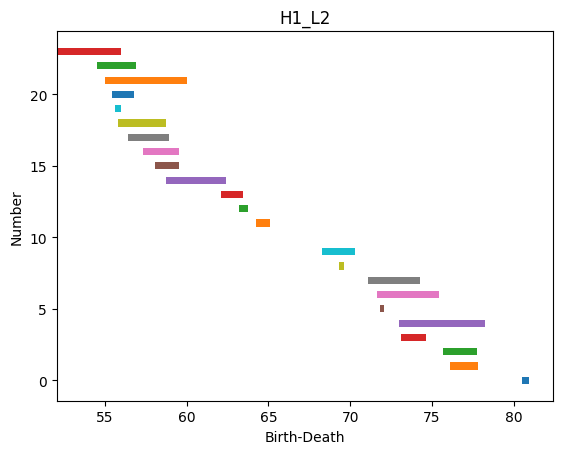

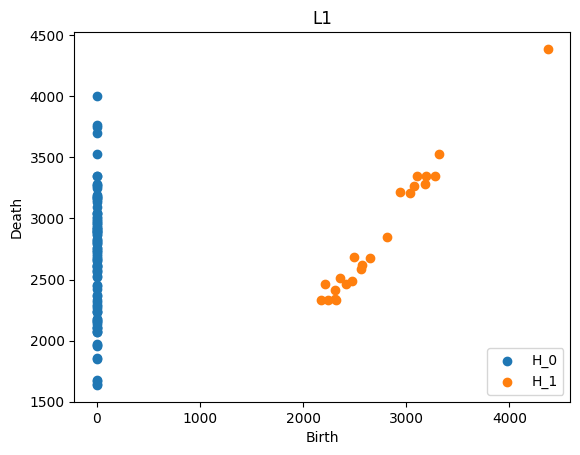

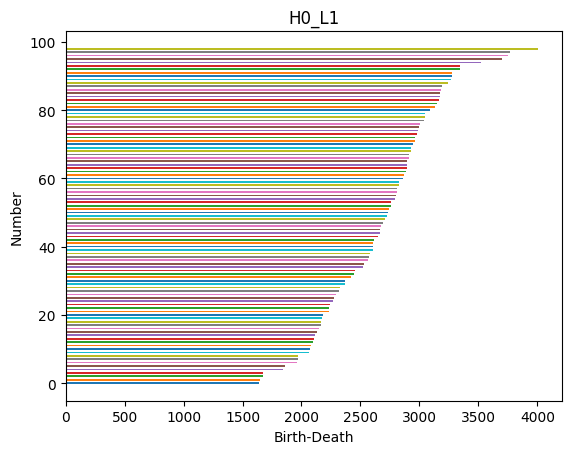

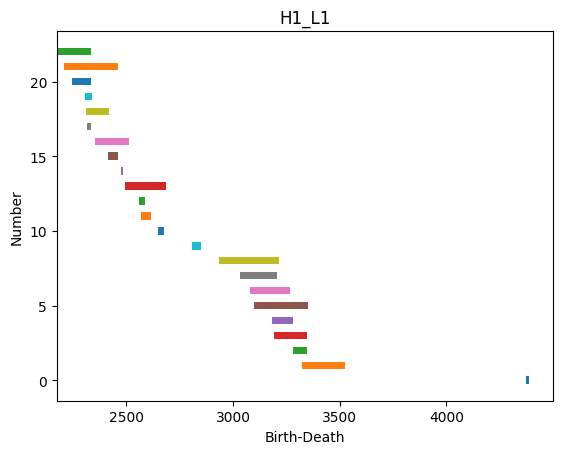

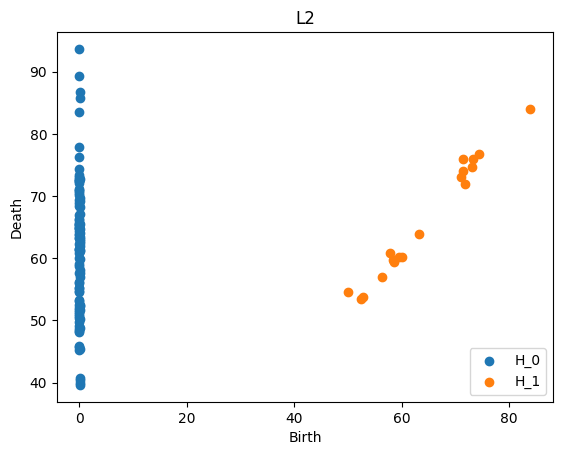

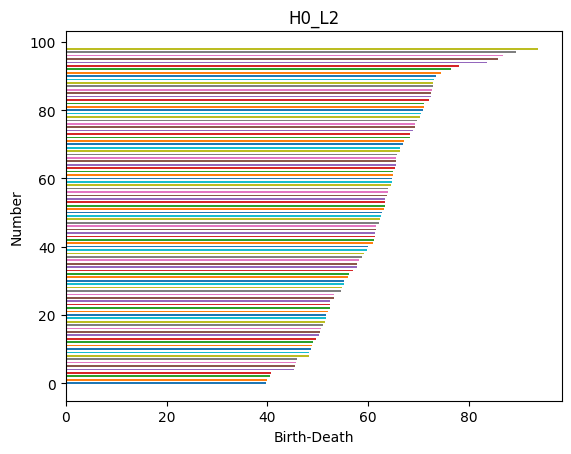

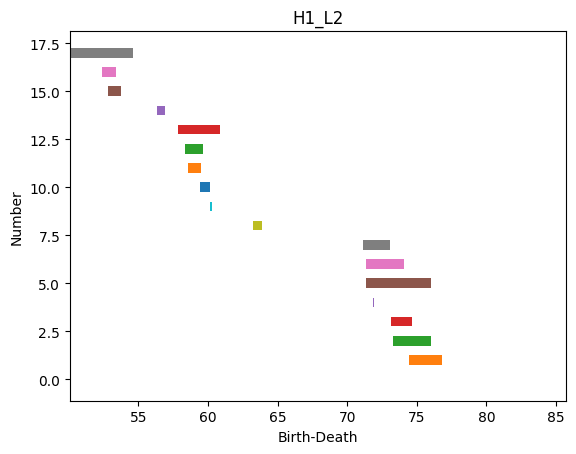

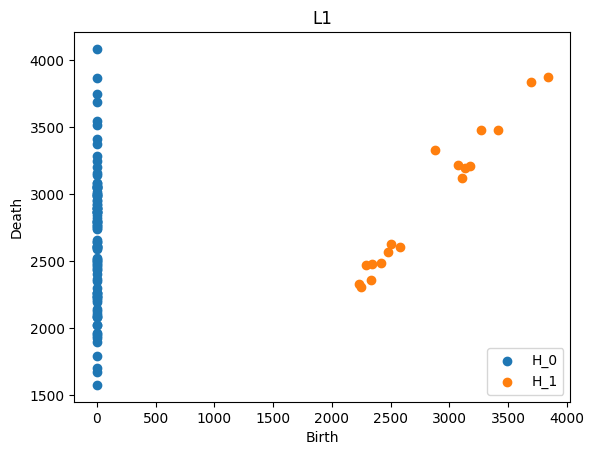

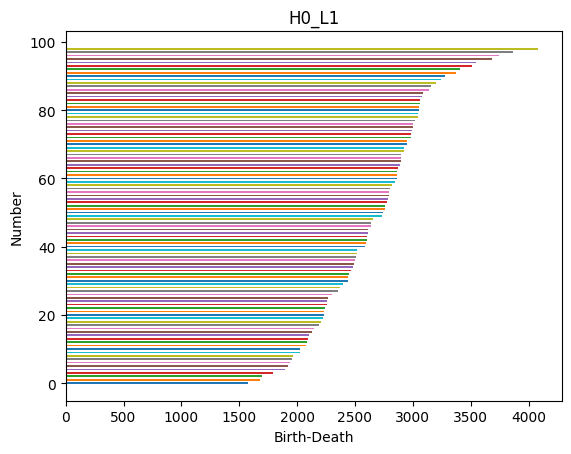

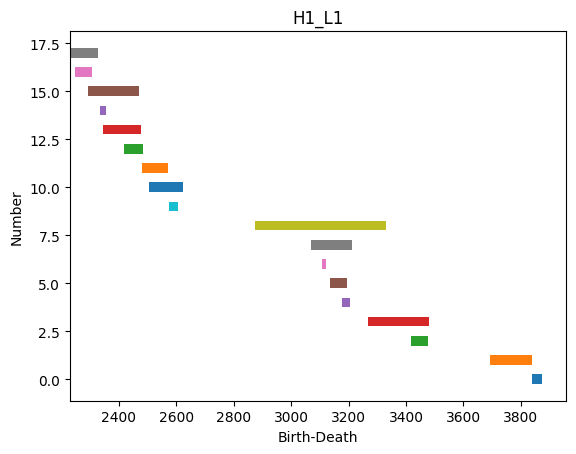

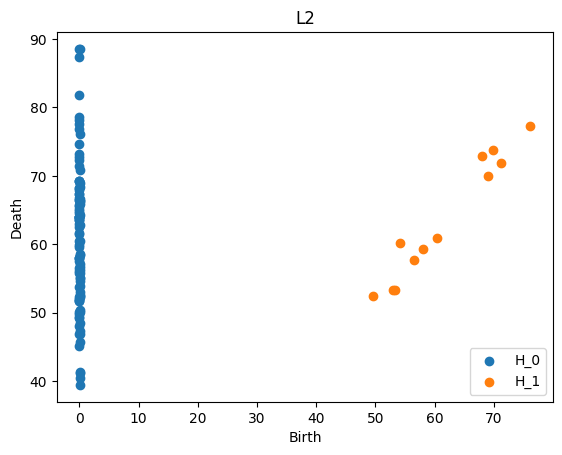

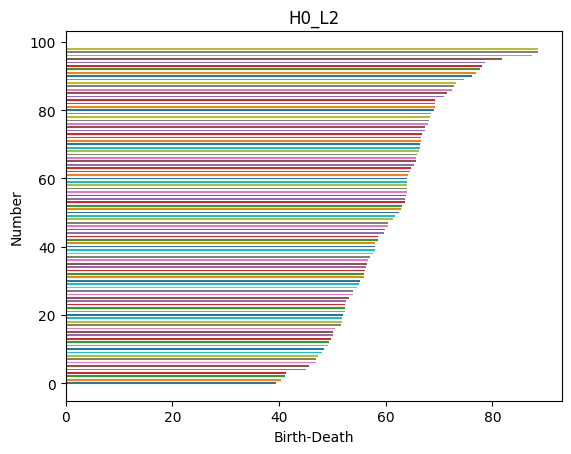

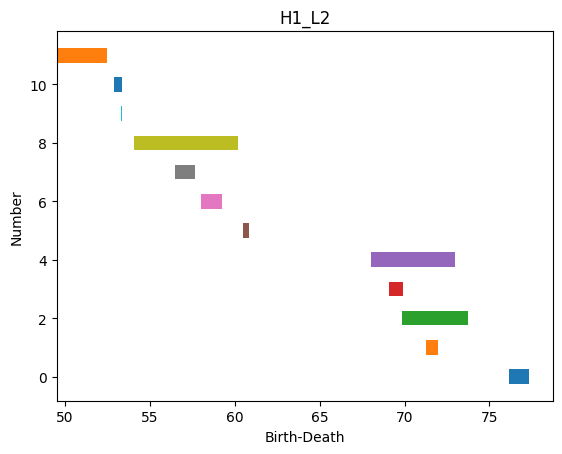

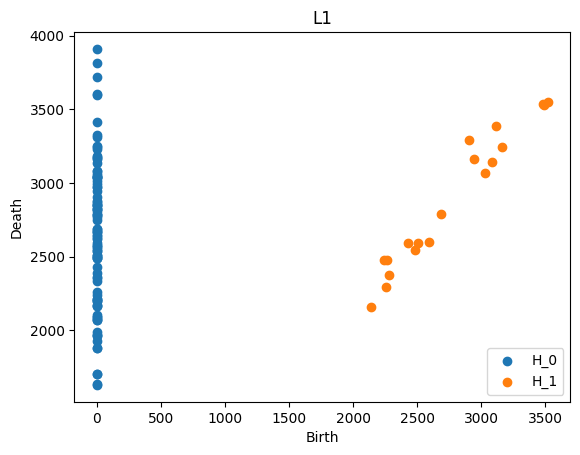

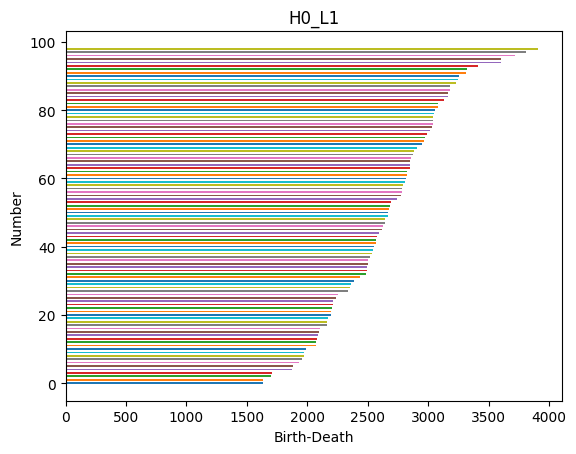

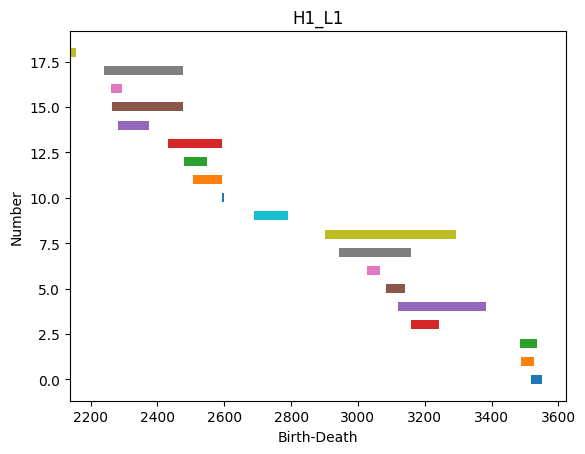

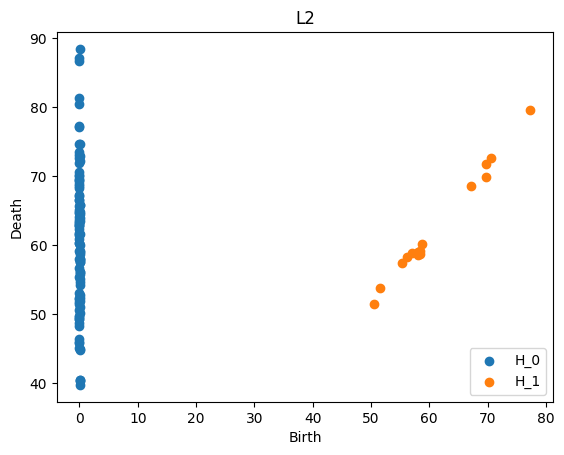

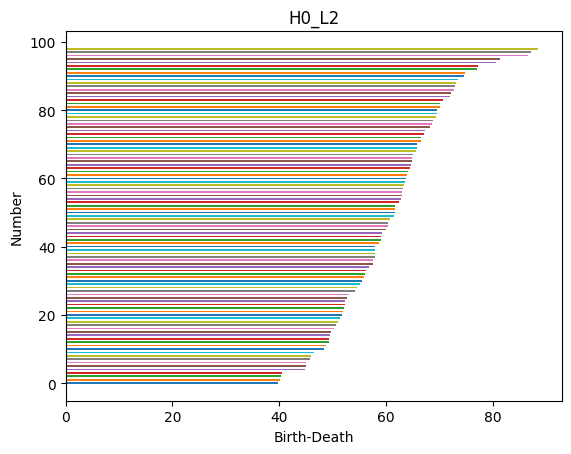

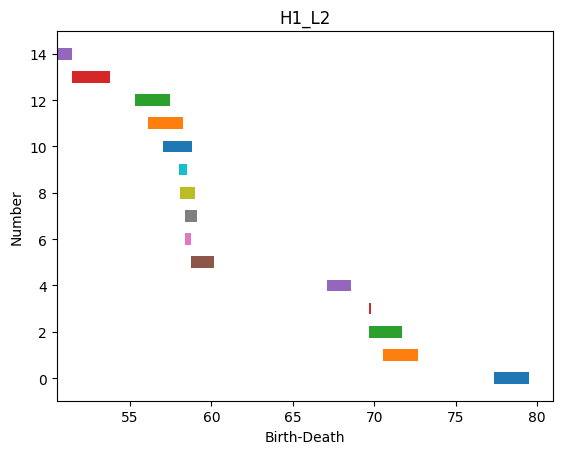

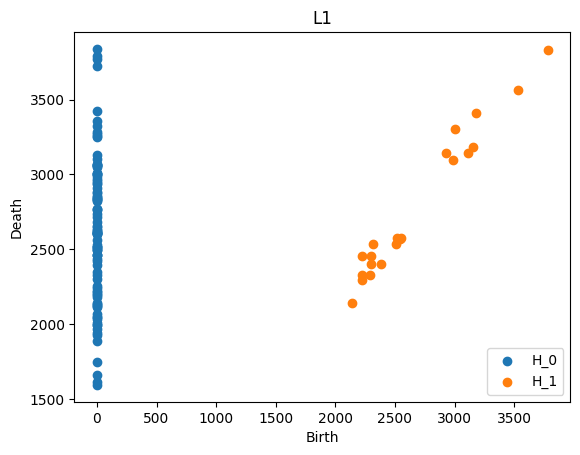

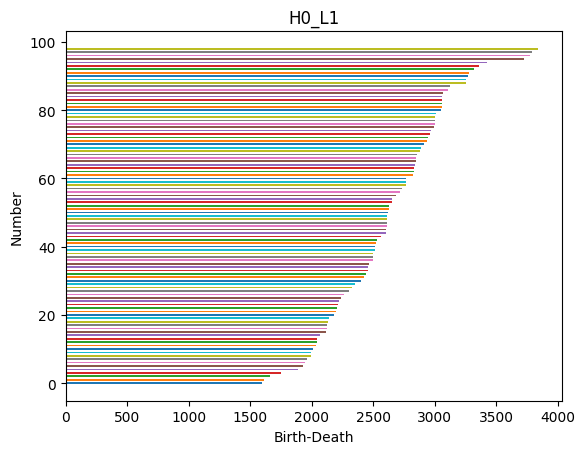

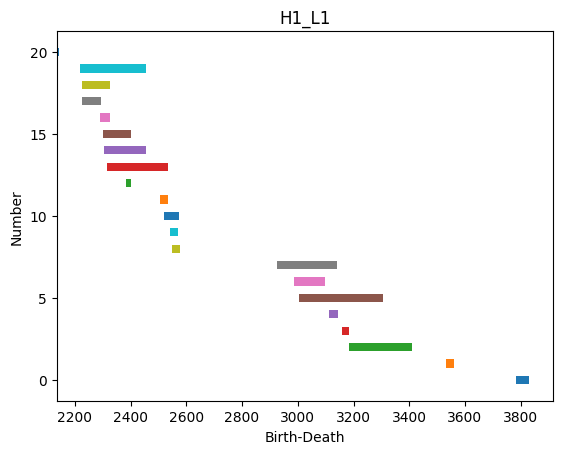

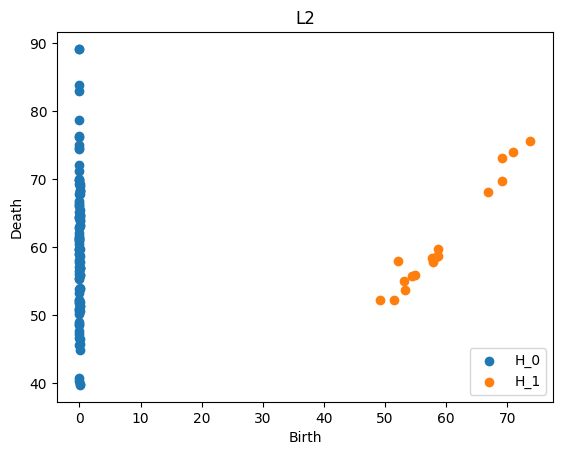

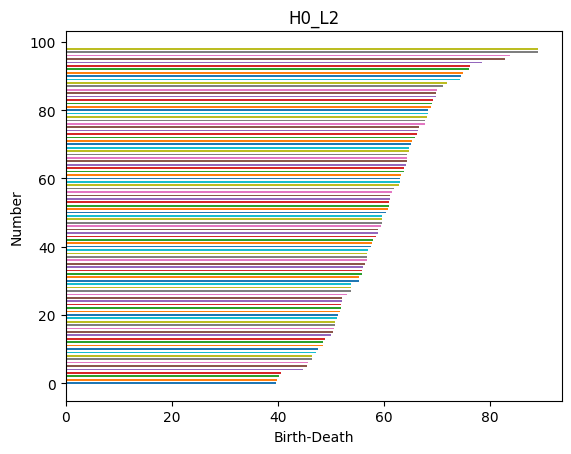

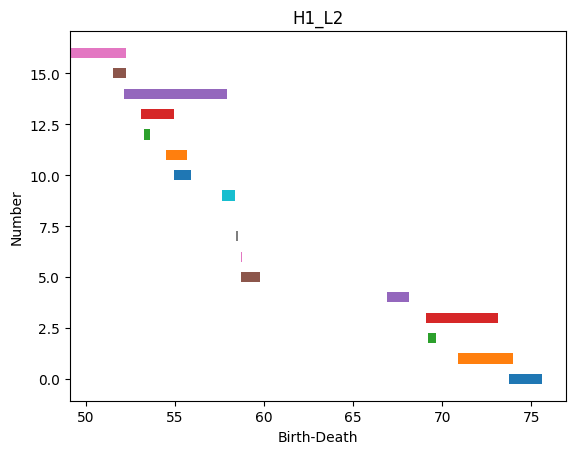

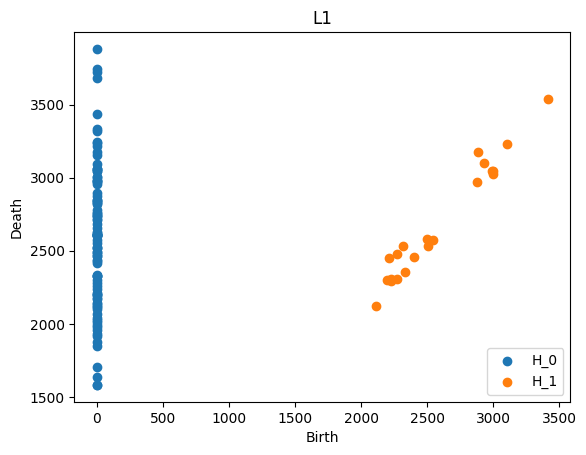

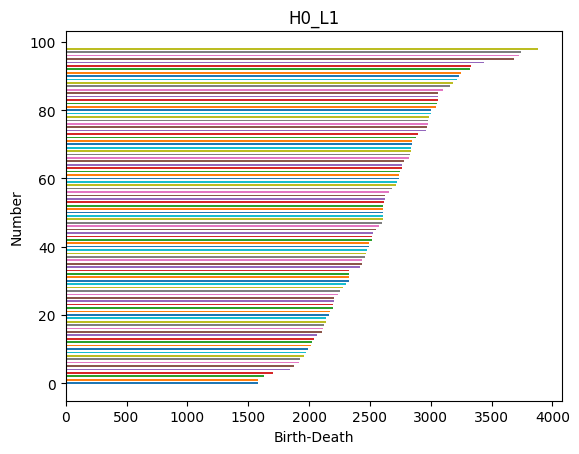

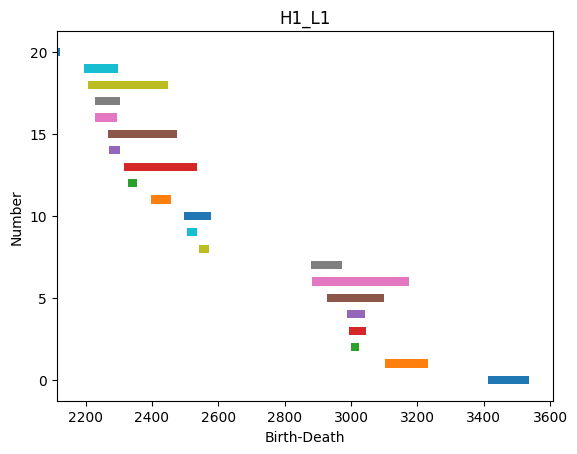

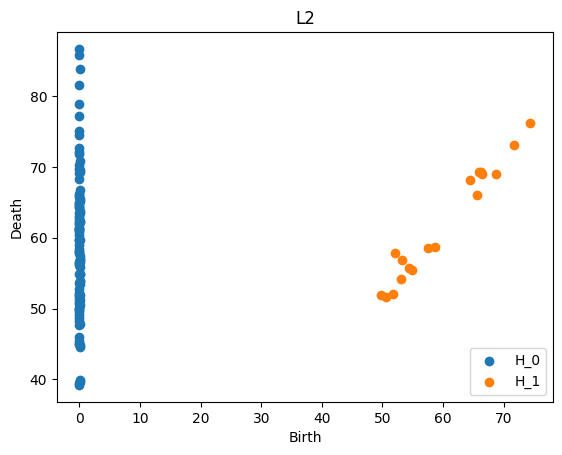

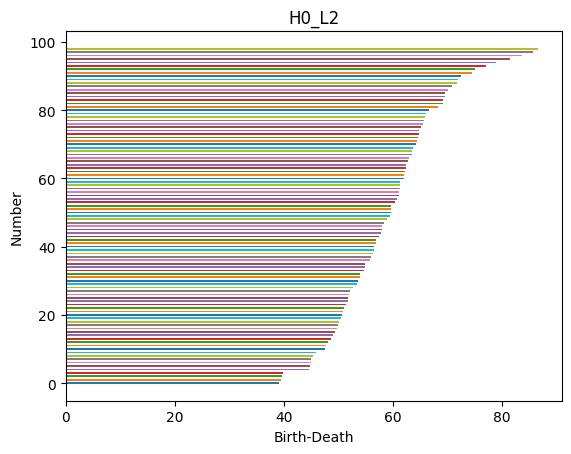

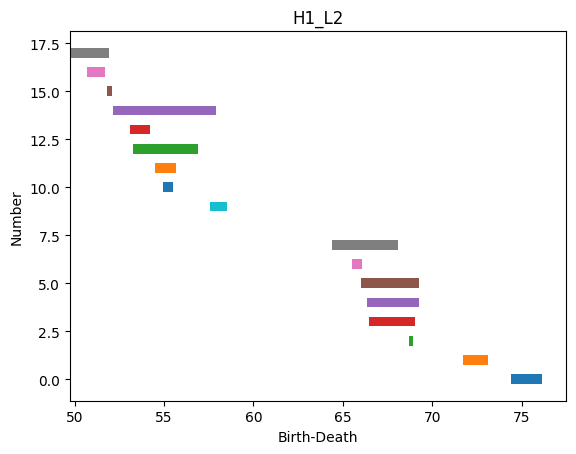

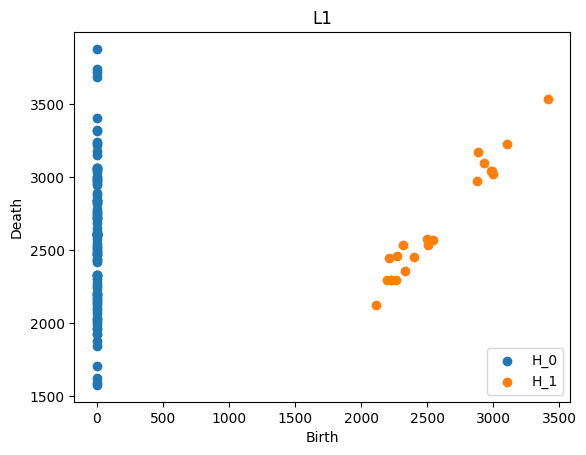

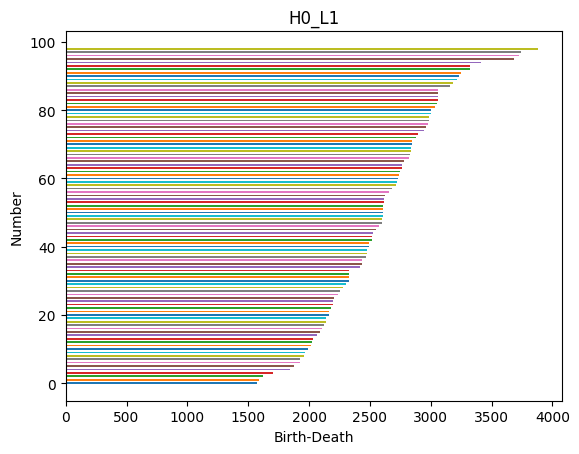

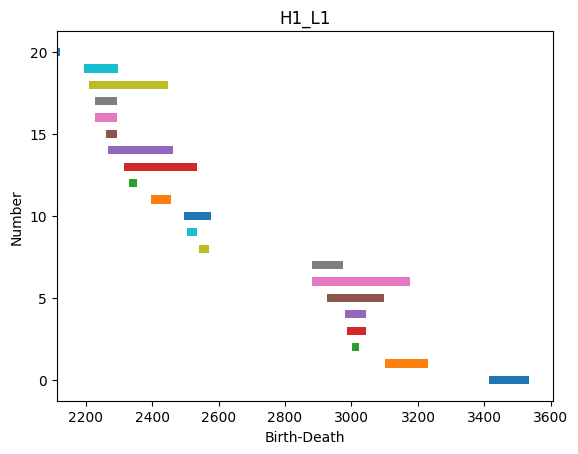

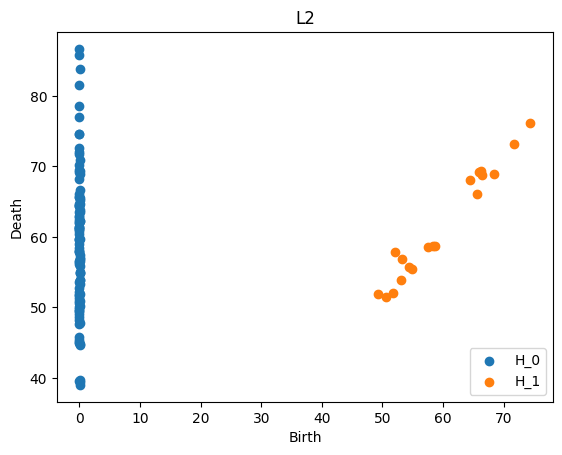

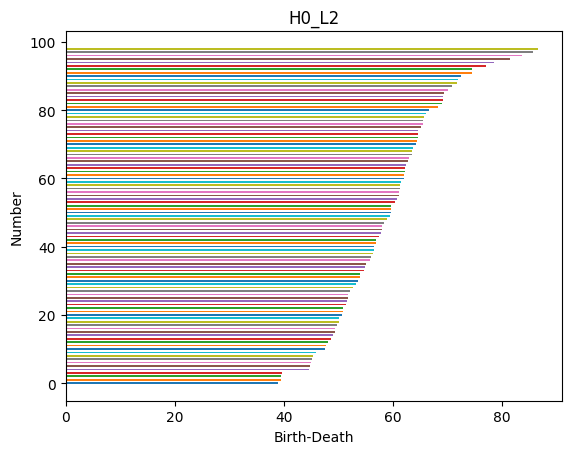

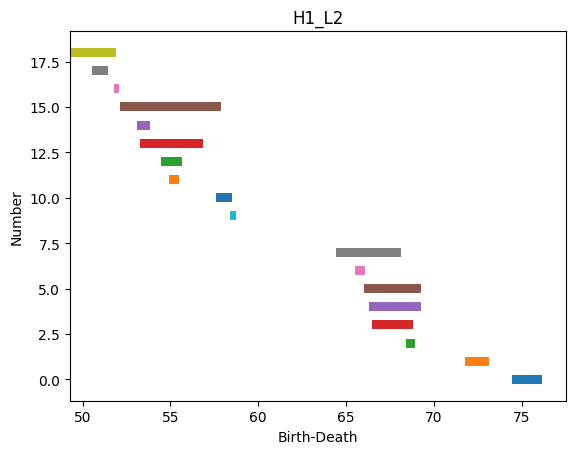

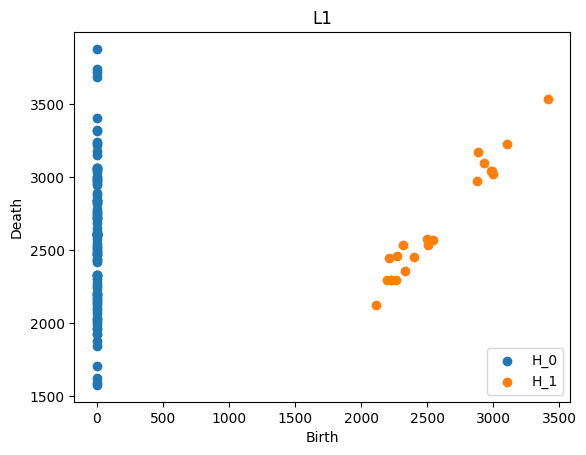

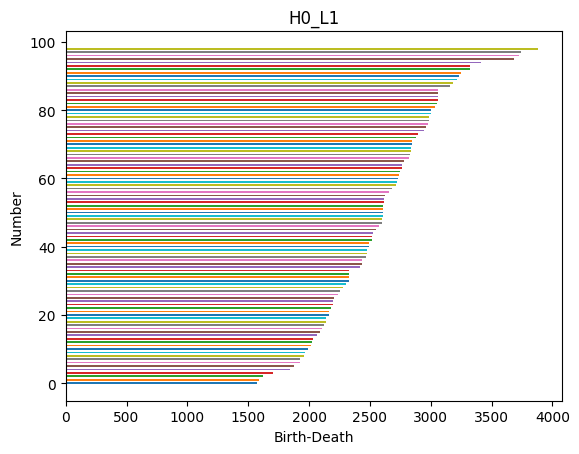

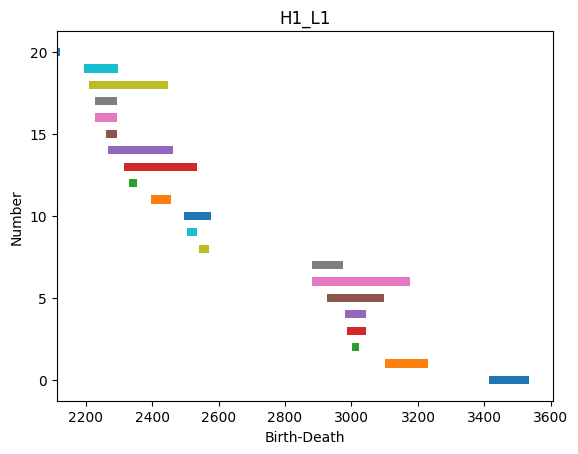

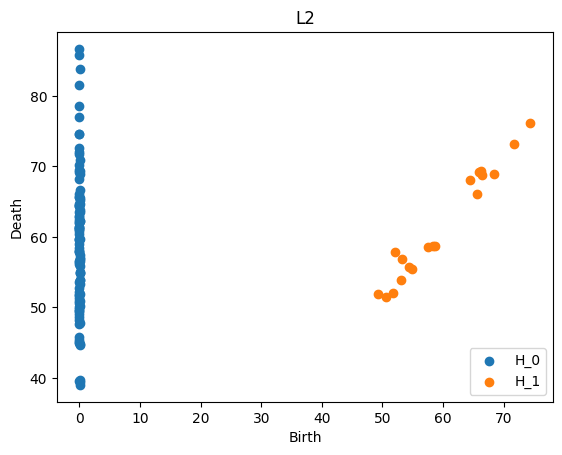

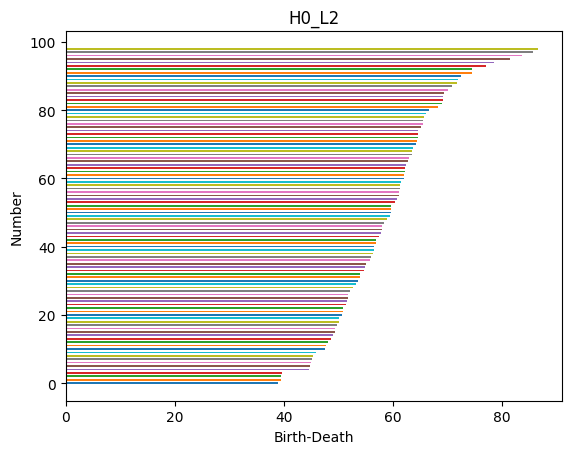

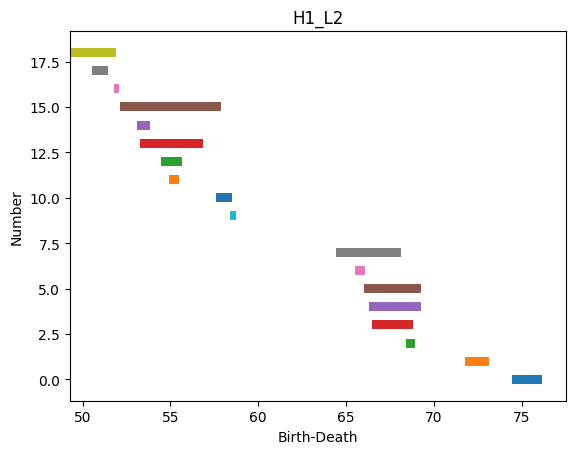

In [3]:
image_size = 32
CIFAR_MEAN = [0.49139968, 0.48215827, 0.44653124]
CIFAR_STD = [0.2023, 0.1994, 0.2010]

i = 1
min_angle_list = range(-30,1,1)
# for min_angle in tqdm(min_angle_list, unit="degree", desc="min_angle"):
for min_angle in min_angle_list:
    max_angle = -min_angle
    data_transform={'train':transforms.Compose([
                        # transforms.RandomHorizontalFlip(),
                        # transforms.Resize(image_size),
                        # transforms.CenterCrop(image_size),
                        transforms.RandomRotation(degrees=(min_angle, max_angle)),
                        transforms.ToTensor(),
                        transforms.Normalize(CIFAR_MEAN, CIFAR_STD)
                        ])}
    # print(f"\n 现在的最小角度是{min_angle}，最大角度是{max_angle}.\n")
    save_floor = f"./distance/angle/data/{max_angle}/"
    betti_4_data(seed=15, save_root=save_floor, debug_size=100,name="data", transform=data_transform["train"])